# CSMODEL PROJECT 1
**Mark Edward M. Gonzales**, **Hylene Jules G. Lee** <br>
mark_gonzales@dlsu.edu.ph, hylene_jules_lee@dlsu.edu.ph

In partial fulfillment of the requirements for the Statistical Modelling and Simulation (CSMODEL) class under **Mr. Arren Matthew C. Antioquia** of the Software Technology Department of the College of Computer Studies of De La Salle University, this Jupyter notebook presents the process of data preparation, research question formulation, data analysis, and data modelling with the goal of extracting insights from a selected real-world dataset.

For brevity and accessibility, hyperlinks are provided for the technical references (e.g., API documentations of library functions) and primary sources (e.g., links to the original repositories of the datasets) that were used or consulted. Other supplementary references are given parenthetical and bibliographic citations. 

<hr>

# PRELIMINARIES

The following libraries and modules &mdash; all of which are automatically bundled with an Anaconda installation &mdash; were used in this notebook:

Library/Module | Description | License
:-- | :-- | :--
<a href = "https://docs.python.org/3/library/os.html">`os`</a> | Provides miscellaneous operating system interfaces | Python Software Foundation License
<a href = "https://pandas.pydata.org/">`pandas`</a> | Provides functions for data analysis and manipulation	 | BSD 3-Clause "New" or "Revised" License
<a href = "https://numpy.org/">`numpy`</a> | Provides a multidimensional array object, various derived objects, and an assortment of routines for fast operations on arrays | BSD 3-Clause "New" or "Revised" License
<a href = "https://www.scipy.org/">`scipy`</a> | Provides efficient numerical routines, such as those for numerical integration, interpolation, optimization, linear algebra, and statistics | BSD 3-Clause "New" or "Revised" License
<a href = "https://matplotlib.org/">`matplotlib`</a> | Provides functions for creating static, animated, and interactive visualizations | Matplotlib License (BSD-Compatible)

*The descriptions are taken from their respective websites.*

In [1]:
import os

import pandas as pd
import numpy as np
import scipy.stats

import matplotlib.pyplot as plt

<hr>

# DATASET REPRESENTATION

The primary dataset analyzed in this notebook is the **Organisation for Economic Co-operation and Development (OECD) Programme for International Student Assessment (PISA) 2018 School Questionnaire Dataset** (henceforth referred to as the "2018 PISA School Dataset"), published on the data science community website <a href = "https://www.kaggle.com/dilaraahan/pisa-2018-school-questionnaire">Kaggle</a> on July 9, 2021. It contains the responses of the countries that answered the 2018 PISA School Questionnaire, which covers areas pertaining to the background of the schools, their management, their teaching staff, their students' performance on assessments, and their climates, as well information regarding targeted groups, such as multicultural learners (OECD, 2017).

To enrich the data analysis, two auxiliary datasets were also consulted: 
- The **2018 OECD PISA Average Score of Mathematics, Science, and Reading Test Scores Dataset** (henceforth referred to as the "2018 PISA Scores Dataset"), published on the data visualization website <a href = "https://factsmaps.com/pisa-2018-worldwide-ranking-average-score-of-mathematics-science-reading/">FactsMaps</a> on December 4, 2019. It contains the average of the scores of the countries that took the 2018 PISA mathematics, science, and reading scholastic tests. 
- The **ISO 3166-1 alpha-3 Code List** (henceforth referred to by the same name), published on the knowledge base of the <a href = "https://unstats.un.org/unsd/tradekb/knowledgebase/country-code">United Nations International Trade Statistics</a> in 2016. It enumerates the three-letter codes assigned by the International Organization for Standardization (ISO) to countries, dependent territories, and special geographical areas.

Both of the PISA datasets are consolidated versions of the pertinent official raw data released by the OECD on its <a href = "https://www.oecd.org/pisa/data/2018database/#d.en.516012">website</a>. Therefore, their use in this notebook is subject to the <a href = "https://www.oecd.org/termsandconditions/">terms and conditions</a> of the OECD.

## A. Data Collection

This section describes the data collection process executed to build the datasets, alongside the implications of the data collection methods on the conclusions and insights generated at the end of the data analysis.

### 1. 2018 PISA School Dataset

The 2018 PISA School Dataset was constructed and organized by Dilara Şahan and Söz Tuana Kurşun from Muğla Sıtkı Koçman University, Turkey, into a comma-separated values (CSV) file based on the raw data published by the OECD on its <a href = "https://www.oecd.org/pisa/data/2018database/#d.en.516012">website</a> in December 2019. 

PISA, an acronym for "Programme for International Student Assessment," is a triennial assessment covering reading, mathematics, and science literacy that is taken by 15 year-old students (National Center for Education Statistics, n.d.). The 2018 PISA was primarily administered on computers and involved several questionnaires apart from the assessment proper. Two of these involve students answering a 45-minute questionnaire on their personal background and learning experiences, and principals answering a 30-minute questionnaire on school demographics and learning environments. The responses to this latter questionnaire comprise the majority of the data in the 2018 PISA School Dataset.

According to the PISA sampling standards (Westat, 2016), a school may be excluded from the list of eligible participants if it primarily provides instruction to students belonging to the following excluded categories:
- students who are functionally disabled in a way that prevents them from participating in the assessment, such as those with physical disabilities;
- students who have cognitive, behavioral, or emotional disabilities to the extent that they cannot follow the general instructions of the assessment;
- students who have insufficient language experience to take the test; and
- students for which there are no test materials available in their language of instruction.

Schools can be excluded if less than 2% of their student bodies are PISA-eligible; however, for schools in remote areas or those providing instruction using rarely used languages, they can be excluded if up to 2.5% of their student bodies are PISA-eligible. 

During the school sampling process, participating countries or educational systems (groups that do not represent entire countries, such as major cities or states) first submit a school sampling frame, which includes the schools' identification information (such as their national IDs and contact information), a measure of their approximate enrollments of PISA-eligible students, and additional coded information about the schools, including their regions, school types, and the levels of urbanization of their communities, among others. For every school included in the frame, two replacement schools, which should be similar to their respective "original" schools in terms of demographics, are also included. The selection of school samples is then handled by a separate contractor. A sampled school can only be replaced by one of its replacement schools if the original school refuses to participate in the assessment or does not participate for a reason other than ineligibility or exclusion.

Finally, there are also cases where oversampling is performed. Oversampling often occurs in non-adjudicated instances wherein a country decides to increase its samples for use in other studies, such as regional comparisons. Performing an oversampling requires advance notification and negotiation with the OECD; among other guidelines, countries that perform oversampling are required to provide at least 25 large schools for each sampled group (Westat, 2017). 

### 2. 2018 PISA Scores Dataset

The 2018 PISA Scores Dataset was constructed and organized by Andras Borzsonyi into a webpage based on the raw data published by the OECD on its <a href = "https://www.oecd.org/pisa/data/2018database/#d.en.516012">website</a> in December 2019. 

After determining the participating schools using the school sampling process as discussed above, the OECD then performs further sampling on a student level. To obtain a representative sample of students, the OECD selects 15-year-old students (specifically, students who are between 15 years and 3 months and 16 years and 2 months) in grades 7 to 12 attending both public and private schools (National Center for Education Statistics, n.d.). Students from each of the participating schools are randomly sampled, and the assessment requires the participation of at least 6300 students per educational system. However, adjustments are made for small schools (schools with a low number of PISA-eligible students), such as undersampling students or excluding the school following specified standards, in order to prevent administrative burdens and the inability to reach the required sample size.

After the list of participating students is determined, the OECD performs rigid checks for PISA eligibility. At least 80% of the selected students must participate in the assessment for the PISA results of a country or educational system to be included in the database. Unlike the process for determining participating schools, however, the assessment does not permit replacement students to take the place of originally sampled students who are unavailable; instead, the PISA school coordinators and test administrators are tasked to administer follow-up sessions following the guidelines in the PISA National Project Managers Manual (Westat, 2016). 

To report the collected data from the assessment, the OECD uses the PISA scale, a continuous scale developed using item-response theory models that shows the difficulty of the questions and the proficiency of the test-takers; students are expected to have difficulty answering questions placed above their location on the scale and, conversely, to be able to answer questions located on or below their location (OECD, 2019a).

Apart from the PISA scale, the OECD also reports the PISA scores of participating countries and educational systems; these scores are scaled to fit approximately normal distributions, with a mean of 500 score points and standard deviations of 100 score points. To provide a more concrete interpretation of the reported PISA scores, the PISA scales are divided into proficiency levels, with each level corresponding to a range of roughly 80 score points. Hence, it is interpreted that students with a score difference of 80 points or more are located on different levels on the scale and, thus, have different levels of proficiency in a subject.

### 3. ISO 3166-1 alpha-3 Code List

Unlike the two previous datasets, the ISO 3166-1 alpha-3 Code List, organized by the United Nations International Trade Statistics into a webpage, is not the product of a study; rather, it is an enumeration of the three-letter codes assigned by the ISO to countries, dependent territories, and special geographical areas. These codes have been maintained by the ISO since their official introduction as part of <a href = "https://www.iso.org/publication/PUB500001.html">ISO 3166</a> in 1974 (and subsequently of ISO 3166-1 in 1997).


***N.B. For brevity, countries, dependent territories, special geographical areas, and other regions of interest (aside from those in the ISO-3166-1 alpha-3 Code List) are referred to in this notebook as simply "countries" or "countries/regions."***

***In this regard, the terms "country codes" and "country/region codes" are used interchangeably to refer to the three-letter codes assigned to countries, dependent territories, special geographical areas, and other regions of interest. The terms "country names" and "country/region names" are also used analogously.***

### Implications

Since the PISA datasets used in this notebook were gathered through observational studies (as opposed to experimental studies), causations between variables of interest cannot be established. 

The main point of difference between observational and experimental studies is the manipulation (or non-manipulation) of variables. In observational studies, researchers do not interfere in the setup. Since the data are recorded as they appear in nature, only correlations can be drawn between them. It is important to note that correlation does not imply causation; the logical fallacy of assuming otherwise is referred to as *cum hoc ergo propter hoc*, which is Latin for *with this, therefore because of this*. 

On the other hand, in experimental studies, researchers manipulate the variables, typically by giving treatment to one group (the experimental group) while leaving the other group (the control group) untreated. This design makes it possible to isolate the variable of interest definitively. Consequently, the obtained results can be subjected to further analysis and additional iterations of randomized controlled trials to reveal possible cause-and-effect relationships.

Ergo, while it is possible to draw correlations and check for significant differences (or the lack thereof) between variables of interest in the PISA datasets, the insights and interpretations resulting from the application of the appropriate statistical tests are limited to these associations.

## B. Individual Dataset Structure

This section describes the structures and contents of the primary and auxiliary datasets used in this notebook, including the number of rows and columns and descriptions of the observations and variables.

### 1. 2018 PISA School Dataset

The 2018 PISA School Dataset was loaded into a <a href = "https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html">`pandas.DataFrame`</a>. Since it is already provided as a CSV file, it can be readily loaded using the <a href = "https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html">`read_csv()`</a> function.

In [2]:
pisa_school_df = pd.read_csv("data/pisa_school.csv")
pisa_school_df

,Unnamed: 0,CNTRYID,CNT,CNTSCHID,CYC,NatCen,Region,STRATUM,SUBNATIO,OECD,...,EDUSHORT,STAFFSHORT,STUBEHA,TEACHBEHA,SCMCEG,W_SCHGRNRABWT,W_FSTUWT_SCH_SUM,SENWT,VER_DAT,BOOKID
0,1,8,ALB,800002,07MS,800,800,ALB0109,80000,0,...,1.2478,-1.4551,-1.1797,-2.0409,-1.0391,7.98891,115.10603,24.81933,09MAY19:11:20:57,NaN
1,2,8,ALB,800003,07MS,800,800,ALB0109,80000,0,...,0.6221,-1.4551,2.1196,2.5150,-1.0542,6.50492,26.01970,20.20900,09MAY19:11:20:57,NaN
2,3,8,ALB,800004,07MS,800,800,ALB0211,80000,0,...,0.4591,-1.4551,-0.6199,-0.4415,0.9042,6.64198,99.62974,20.63480,09MAY19:11:20:57,NaN
3,4,8,ALB,800005,07MS,800,800,ALB0107,80000,0,...,1.3065,1.2432,-0.2682,-0.0452,-1.5648,5.93762,66.50133,18.44654,09MAY19:11:20:57,NaN
4,5,8,ALB,800006,07MS,800,800,ALB0105,80000,0,...,-0.2376,-1.4551,-1.3196,-2.0409,0.9042,14.61508,277.68645,45.40500,09MAY19:11:20:57,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21898,21899,983,QRT,98300802,07MS,64300,64387,QRT8787,9830000,0,...,1.0245,0.1964,-0.8655,-0.9138,0.3009,8.35477,180.42418,32.18244,01MAY19:20:24:14,NaN
21899,21900,983,QRT,98300803,07MS,64300,64387,QRT8787,9830000,0,...,0.6606,0.6736,3.4411,3.7879,-4.0518,8.35477,42.30265,32.18244,01MAY19:20:24:14,NaN
21900,21901,983,QRT,98300804,07MS,64300,64387,QRT8787,9830000,0,...,-0.2376,-1.4551,1.4176,1.6385,0.9042,8.35477,96.42515,32.18244,01MAY19:20:24:14,NaN
21901,21902,983,QRT,98300805,07MS,64300,64387,QRT8787,9830000,0,...,0.1111,-0.0019,2.6095,1.5152,-1.0542,8.35477,31.72699,32.18244,01MAY19:20:24:14,NaN


General information on the dataset was displayed. Since it contains more than 100 columns (the default value of <a href = "https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html">`display.max_info_columns`</a>), the `verbose` parameter of <a href = "https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html">`info()`</a> was set to `True` to display all the data columns. For the same reason, the `null_counts` parameter was also explicitly set to `True`.

In [3]:
pisa_school_df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21903 entries, 0 to 21902
Data columns (total 198 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        21903 non-null  int64  
 1   CNTRYID           21903 non-null  int64  
 2   CNT               21903 non-null  object 
 3   CNTSCHID          21903 non-null  int64  
 4   CYC               21903 non-null  object 
 5   NatCen            21903 non-null  int64  
 6   Region            21903 non-null  int64  
 7   STRATUM           21903 non-null  object 
 8   SUBNATIO          21903 non-null  int64  
 9   OECD              21903 non-null  int64  
 10  ADMINMODE         21903 non-null  int64  
 11  LANGTEST          21117 non-null  float64
 12  SC001Q01TA        20540 non-null  float64
 13  SC013Q01TA        19811 non-null  float64
 14  SC016Q01TA        18853 non-null  float64
 15  SC016Q02TA        16300 non-null  float64
 16  SC016Q03TA        15741 non-null  float

The dataset contains 21903 observations (rows) across 198 variables (columns). Each observation corresponds to an entry from a school that participated in the 2018 PISA survey for schools, and the variables correspond to background information about it, the responses of its principal to the Main Survey Version of the School Questionnaire, and additional information derived from these responses.

As explained by Şahan and Kurşun (2021) and in the official codebook published by the OECD (2019a), the variables and encoding schemes for selected categorical responses are as follows:

Column Name | Description
:-- | :--
(unnamed) | Observation index (one-based)
`CNTRYID` | Numerical country identifier
`CNT` | Three-letter country identifier
`CNTSCHID` | International school identifier
`CYC` | PISA assessment cycle (the suffixes `MS` and `FT` refer to "main survey" and "field trial," respectively)
`NatCen` | National center identifier
`Region` | Regional identifier
`STRATUM` | 7-character stratum identifier
`SUBNATIO` | Adjudicated subregional identifier
`OECD` | OECD membership (0 if the country is a member; 1, otherwise)
`ADMINMODE` | Mode of administration (1 for pen-and-paper and 2 for computer)
`LANGTEST` | Numerical code for the language of the School Questionnaire
`SC001Q01TA` to `SC052Q03HA` | Responses to the Main Survey Version of the School Questionnaire
`PRIVATESCH` | School type, as derived from the sampling information (`public`, `private`, or `missing`)
`SCHLTYPE` | Numerical code for the ownership of the school (1 for private independent, 2 for private government-dependent, and 3 for public [OECD, 2019b])
`STRATIO` | Student-teacher ratio
`SCHSIZE` | School size
`RATCMP1` | Number of available computers per student at modal grade
`RATCMP2` | Proportion of available computers that are connected to the Intenet
`TOTAT` | Total number of all teachers at school
`PROATCE` | Index proportion of all teachers that are fully certified
`PROAT5AB` | Index proportion of all teachers with an International Standard Classification of Education (ISCED) Level 5A Bachelor's degree
`PROAT5AM` | Index proportion of all teachers with an ISCED Level 5A Master's degree
`PROAT6` | Index proportion of all teachers ISCED Level 6
`CLSIZE` | Class size
`CREACTIV` | Number of creative extracurricular activities
`EDUSHORT` | Weighted likelihood estimator (WLE) of shotage of educational material
`STAFFSHORT` | WLE of shortage of educational staff
`STUBEHA` | WLE of student behavior hindering learning
`TEACHBEHA` | WLE of teacher behavior hindering learning
`SCMCEG` | WLE of the school principal's view on teachers' multicultural and egalitarian beliefs
`W_SCHGRNRABWT` | Grade nonresponse adjusted school base weight
`W_FSTUWT_SCH_SUM` | Sum of final trimmed nonresponse adjusted student weight
`SENWT` | Normalized senate weight for analyses of student performance (transformation of the full sampling weight, totaling to 5000 per country [OECD, 2019c])
`VER_DAT` | Date of entry addition to the database
`BOOKID` | Form identifier

Below is a verbatim listing of the questions in the <a href = "https://www.oecd.org/pisa/data/2018database/CY7_201710_QST_MS_SCQ_NoNotes_final.pdf">Main Survey Version of the School Questionnaire</a>, the responses to which are given in the `SC001Q01TA` to `SC052Q03HA` columns. The encoding schemes for the categorical responses are also enumerated (note that, for yes-or-no questions, 1 signifies a positive response while 2 signifies a negative response):

- `SC001Q01TA` - Which of the following definitions best describes the community in which your school is located? 
    - 1 for a village, hamlet, or rural area (fewer than 3 000 people)
    - 2 for a small town (3 000 to about 15 000 people)
    - 3 for a town (15 000 to about 100 000 people)
    - 4 for a city (100 000 to 1 000 000 people)
    - 5 for a large city (with over 1 000 000 people)
- `SC013Q01TA`- Is your school a public or a private school?
    - 1 for a public school (This is a school managed directly or indirectly by a public education authority, government agency, or governing board appointed by government or elected by public franchise.)
    - 2 for a private school (This is a school managed directly or indirectly by a non-government organisation; e.g. a church, trade union, business, or other private institution.)
- About what percentage of your total funding for a typical school year comes from the following sources?
    - `SC016Q01TA` - Government (includes departments, local, regional, state and national) 
    - `SC016Q02TA` - Student fees or school charges paid by parents 
    - `SC016Q03TA` - Benefactors, donations, bequests, sponsorships, parent fundraising 
    - `SC016Q04TA` - Other
- Is your school’s capacity to provide instruction hindered by any of the following issues?
    - `SC017Q01NA` - A lack of teaching staff.
    - `SC017Q02NA` - Inadequate or poorly qualified teaching staff.
    - `SC017Q03NA` - A lack of assisting staff.
    - `SC017Q04NA` - Inadequate or poorly qualified assisting staff.
    - `SC017Q05NA` - A lack of educational material (e.g. textbooks, IT equipment, library or laboratory material).
    - `SC017Q06NA` - Inadequate or poor quality educational material (e.g. textbooks, IT equipment, library or laboratory material).
    - `SC017Q07NA` - A lack of physical infrastructure (e.g. building, grounds, heating/cooling, lighting and acoustic systems).
    - `SC017Q08NA` - Inadequate or poor quality physical infrastructure (e.g. building, grounds, heating/cooling, lighting and acoustic systems).
- Who has the main responsibility for career guidance of students in <national modal grade for 15-year-olds> at your school?
    - `SC161Q01SA` - Not applicable, career guidance is not available in this school 
    - `SC161Q02SA` - All teachers share the responsibility for career guidance 
    - `SC161Q03SA` - Specific teachers have the main responsibility for career guidance
    - `SC161Q04SA` - We have one or more specific career guidance counsellors employed at school
    - `SC161Q05SA` - We have one or more specific career guidance counsellors who regularly visit the school
- `SC162Q01SA` - If career guidance is available at your school, which of the statements below best describes the situation for students in <national modal grade for 15-year olds>?
    - 1 for career guidance is sought voluntarily by students
    - 2 for career guidance is formally scheduled into students’ time at school
- To what extent do you agree with the following statements about your school’s capacity to enhance learning and teaching using digital devices? (Likert scale: 1 for strongly disagree to 4 for strongly agree)
    - `SC155Q01HA` - The number of digital devices connected to the Internet is sufficient
    - `SC155Q02HA` - The school’s Internet bandwidth or speed is sufficient
    - `SC155Q03HA` - The number of digital devices for instruction is sufficient
    - `SC155Q04HA` - Digital devices at the school are sufficiently powerful in terms of computing capacity
    - `SC155Q05HA` - The availability of adequate software is sufficient 
    - `SC155Q06HA` - Teachers have the necessary technical and pedagogical skills to integrate digital devices in instruction
    - `SC155Q07HA` - Teachers have sufficient time to prepare lessons integrating digital devices
    - `SC155Q08HA` - Effective professional resources for teachers to learn how to use digital devices are available
    - `SC155Q09HA` - An effective online learning support platform is available
    - `SC155Q10HA` - Teachers are provided with incentives to integrate digital devices in their teaching
    - `SC155Q11HA` - The school has sufficient qualified technical assistant staff
- Does your school have any of the following?
    - `SC156Q01HA` - Its own written statement about the use of digital devices
    - `SC156Q02HA` - Its own written statement specifically about the use of digital devices for pedagogical purposes
    - `SC156Q03HA` - A programme to use digital devices for teaching and learning in specific subjects
    - `SC156Q04HA` - Regular discussions with teaching staff about the use of digital devices for pedagogical purposes
    - `SC156Q05HA` - A specific programme to prepare students for responsible internet behaviour
    - `SC156Q06HA` - A specific policy about using social networks (<Facebook\>, etc.) in teaching and learning
    - `SC156Q07HA` - A specific programme to promote collaboration on the use of digital devices among teachers 
    - `SC156Q08HA` - Scheduled time for teachers to meet to share, evaluate or develop instructional materials and approaches that employ digital devices
- `SC011Q01TA` - Which of the following statements best describes the schooling available to students in your location?
    - 1 for there are two or more other schools in this area that compete for our students.
    - 2 for there is one other school in this area that competes for our students.
    - 3 for there are no other schools in this area that compete for our students.
- How often are the following factors considered when students are admitted to your school?
    - `SC012Q01TA` - Student’s record of academic performance (including placement tests)
    - `SC012Q02TA` - Recommendation of feeder schools
    - `SC012Q03TA` - Parents’ endorsement of the instructional or religious philosophy of the school
    - `SC012Q04TA` - Whether the student requires or is interested in a special programme
    - `SC012Q05TA` - Preference given to family members of current or former students 
    - `SC012Q06TA` - Residence in a particular area 
    - `SC012Q07TA` - Other
- What is your school’s policy about this for students in <national modal grade for 15-year-olds>?
    - `SC042Q01TA` - Students are grouped by ability into different classes. 
    - `SC042Q02TA` - Students are grouped by ability within their classes.
- In your school, are assessments of students in <national modal grade for 15-year-olds> used for any of the following purposes?
    - `SC154Q01HA` - To guide students’ learning
    - `SC154Q02WA` - To inform parents about their child’s progress
    - `SC154Q03WA` - To make decisions about students’ retention or promotion
    - `SC154Q04WA` - To group students for instructional purposes
    - `SC154Q05WA` - To compare the school to <district or national\> performance
    - `SC154Q06WA` - To monitor the school’s progress from year to year
    - `SC154Q07WA` - To make judgements about teachers’ effectiveness
    - `SC154Q08WA` - To identify aspects of instruction or the curriculum that could be improved
    - `SC154Q09HA` - To adapt teaching to the students’ needs
    - `SC154Q10WA` - To compare the school with other schools
    - `SC154Q11HA` - To award certificates to students 
- In your school, are achievement data used in any of the following <accountability procedures\>?
    - `SC036Q01TA` - Achievement data are posted publicly (e.g. in the media)
    - `SC036Q02TA` - Achievement data are tracked over time by an administrative authority
    - `SC036Q03NA` - Achievement data are provided directly to parents
- Do the following arrangements aimed at quality assurance and improvements exist in your school and where do they come from?
    - `SC037Q01TA` - Internal evaluation/Self-evaluation
    - `SC037Q02TA` - External evaluation
    - `SC037Q03TA` - Written specification of the school’s curricular profile and educational goals
    - `SC037Q04TA` - Written specification of student performance standards
    - `SC037Q05NA` - Systematic recording of data such as teacher or student attendance and professional development
    - `SC037Q06NA` - Systematic recording of student test results and graduation rates
    - `SC037Q07TA` - Seeking written feedback from students (e.g. regarding lessons, teachers or resources)
    - `SC037Q08TA` - Teacher mentoring
    - `SC037Q09TA` - Regular consultation aimed at school improvement with one or more experts over a period of at least six months
    - `SC037Q10NA` - Implementation of a standardised policy for reading subjects (i.e. school curriculum with shared instructional materials accompanied by staff development and training)
- Do the following statements reflect teachers’ practices for multicultural learning in your school?
    - `SC165Q01HA` - In our school, students learn about the histories of diverse cultural groups that live in <country of test\>. 
    - `SC165Q02HA` - In our school, students learn about the histories of diverse cultural groups that live in other countries.
    - `SC165Q03HA` - In our school, students learn about the cultures (e.g. beliefs, norms, values, customs, or arts) of diverse cultural groups that live in <country of test\>.
    - `SC165Q04HA` - In our school, students learn about different cultural perspectives on historical and social events.
    - `SC165Q05HA` - Our school supports activities that encourage students’ expression of diverse identities (e.g. national, religious, ethnic or social identities).
    - `SC165Q06HA` - Our school offers an exchange programme with schools in other countries. 
    - `SC165Q07HA` - Our school organises multicultural events (e.g. cultural diversity day).
    - `SC165Q08HA` - In our school, we celebrate festivities from other cultures.
    - `SC165Q09HA` - In our school, students are encouraged to communicate with people from other cultures via web/internet/social media.
    - `SC165Q10HA` - Our school adopts different approaches to educate students about cultural differences (e.g. teamwork, peer to peer learning, simulations, problem-based learning, music, art, etc.).
- To what extent do the following statements reflect an opinion shared by your teaching staff?
    - `SC166Q02HA` - It is important for students to learn that people from other cultures can have different values
    - `SC166Q03HA` - Respecting other cultures is something that students should learn as early as possible.
    - `SC166Q05HA` - In the classroom, it is important that students of different origins recognise the similarities that exist between them.
    - `SC166Q06HA` - When there are conflicts between students of different origins, they should be encouraged to resolve the argument by finding common ground.
- Is there any formal curriculum for the following in <national modal grade for 15-year-olds>?
    - `SC167Q01HA` - Communicating with people from different cultures or countries
    - `SC167Q02HA` - Knowledge of different cultures
    - `SC167Q03HA` - Openness to intercultural experiences
    - `SC167Q04HA` - Respect for cultural diversity
    - `SC167Q05HA` - Foreign languages
    - `SC167Q06HA` - Critical thinking skills
- Is there any formal curriculum for the following topics in <national modal grade for 15-year-olds>?
    - `SC158Q01HA` - Climate change and global warming
    - `SC158Q02HA` - Global health (e.g. epidemics)
    - `SC158Q04HA` - Migration (movement of people) 
    - `SC158Q07HA` - International conflicts
    - `SC158Q08HA` - Hunger or malnutrition in different parts of the world
    - `SC158Q09HA` - Causes of poverty
    - `SC158Q12HA` - Equality between men and women in different parts of the world
- In your school, to what extent is the learning of students hindered by the following phenomena?
    - `SC061Q01TA` - Student truancy
    - `SC061Q02TA` - Students skipping classes
    - `SC061Q03TA` - Students lacking respect for teachers 
    - `SC061Q04TA` - Student use of alcohol or illegal drugs
    - `SC061Q05TA` - Students intimidating or bullying other students  
    - `SC061Q11HA` - Students not being attentive 
    - `SC061Q06TA` - Teachers not meeting individual students’ needs
    - `SC061Q07TA` - Teacher absenteeism
    - `SC061Q08TA` - Staff resisting change
    - `SC061Q09TA` - Teachers being too strict with students 
    - `SC061Q10TA` - Teachers not being well prepared for classes
- As of <February 1, 2018>, what was the total school enrolment (number of students)?
    - `SC002Q01TA` - Number of boys
    - `SC002Q02TA` - Number of girls
- Please estimate the percentage of students in <national modal grade for 15-year-olds> in your school who have the following characteristics.
    - `SC048Q01NA` - Students whose <heritage language\> is different from <test language\>
    - `SC048Q02NA` - Students with special needs
    - `SC048Q03NA` - Students from socioeconomically disadvantaged homes
- The goal of the following set of questions is to gather information about the student-computer ratio for students in the <national modal grade for 15-year-olds> at your school. 
    - `SC004Q01TA` - At your school, what is the total number of students in the <national modal grade for 15-year-olds>?
    - `SC004Q02TA` - Approximately, how many computers are available for these students for educational purposes?
    - `SC004Q03TA` - Approximately, how many of these computers are connected to the Internet/World Wide Web?
    - `SC004Q04NA` - Approximately, how many of these computers are portable (e.g. laptop, tablet)?
    - `SC004Q05NA` - Approximately, how many interactive whiteboards are available in the school altogether?
    - `SC004Q06NA` - Approximately, how many data projectors are available in the school altogether?
    - `SC004Q07NA` - Approximately, how many computers with internet connection are available for teachers in your school?
- How many of the following teachers are on the staff of your school?
    - `SC018Q01TA01` - Full-time teachers in TOTAL
    - `SC018Q01TA02` - Part-time teachers in TOTAL
    - `SC018Q02TA01` - Full-time teachers <fully certified\> by <the appropriate authority\>
    - `SC018Q02TA02` - Part-time teachers <fully certified\> by <the appropriate authority\>
    - `SC018Q05NA01` - Full-time teachers with an <ISCED Level 5A Bachelor degree> qualification 
    - `SC018Q05NA02` - Part-time teachers with an <ISCED Level 5A Bachelor degree> qualification 
    - `SC018Q06NA01` - Full-time teachers with an <ISCED Level 5A Master’s degree> qualification
    - `SC018Q06NA02` - Part-time teachers with an <ISCED Level 5A Master’s degree> qualification
    - `SC018Q07NA01` - Full-time teachers with an <ISCED Level 6> qualification 
    - `SC018Q07NA02` - Part-time teachers with an <ISCED Level 6> qualification 
- `SC025Q01NA` - During the last three months, what percentage of teaching staff in your school has attended a programme of professional development?
- `SC159Q01HA` - Does your school host visiting teachers from other countries?
- `SC003Q01TA` - What is the average size of <test language\> classes in <national modal grade for 15-year-olds> in your school?
    - 1 for 15 students or fewer
    - 2 for 16-20 students 
    - 3 for 21-25 students 
    - 4 for 26-30 students
    - 5 for 31-35 students
    - 6 for 36-40 students
    - 7 for 41-45 students
    - 8 for 46-50 students
    - 9 for more than 50 students 
- <This academic year\>, which of the following activities does your school offer to students in the <national modal grade for 15-year-olds>?
    - `SC053Q01TA` - Band, orchestra or choir
    - `SC053Q02TA` - School play or school musical
    - `SC053Q03TA` - School yearbook, newspaper or magazine
    - `SC053Q04TA` - Volunteering or service activities, e.g. <national examples\> 
    - `SC053Q12IA` - Book club
    - `SC053Q13IA` - Debating club or debating activities
    - `SC053Q09TA` - Art club or art activities
    - `SC053Q10TA` - Sporting team or sporting activities
    - `SC053Q14IA` - Lectures and/or seminars (e.g. guest speakers such as writers or journalists)
    - `SC053Q15IA` - Collaboration with local libraries
    - `SC053Q16IA` - Collaboration with local newspapers
    - `SC053Q11TA` - <country specific item\>
- Does your school offer any of the following options to students in <national modal grade for 15-year-olds> whose <heritage language\> is not the <test language\>?
    - `SC150Q01IA` - These students attend regular classes and receive additional periods of instruction aimed at developing <test language\> skills (e.g. reading literacy, grammar, vocabulary, communication).
    - `SC150Q02IA` - Before transferring to regular classes, these students attend a preparatory programme aimed at developing <test language\> skills (e.g. reading literacy, grammar, vocabulary, communication).
    - `SC150Q03IA` - Before transferring to regular classes, these students receive some instruction in school subjects through their <heritage language\>.
    - `SC150Q04IA` - These students receive significant amounts of instruction in their <heritage language\> aimed at developing proficiency in both languages.
    - `SC150Q05IA` - Class size is reduced to cater to the special needs of these students. 
- `SC164Q01HA` - In the last full academic year, what proportion of students in your school’s final grade left school without a <certificate\>?
- During <the last academic year\>, what proportion of students’ parents participated in the following school-related activities?
    - `SC064Q01TA` - Discussed their child’s progress with a teacher on their own initiative 
    - `SC064Q02TA` - Discussed their child’s progress on the initiative of one of their child’s teachers
    - `SC064Q03TA` - Participated in local school government (e.g. parent council or school management committee) 
    - `SC064Q04NA` - Volunteered in physical or extra-curricular activities (e.g. building maintenance, carpentry, gardening or yard work, school play, sports, field trip)
- `SC152Q01HA` - Does your school offer additional <test language\> lessons apart from <test language\> lessons offered during the usual school hours?
- `SC160Q01WA` - What is the purpose of these additional <test language\> lessons? 
    - 1 for <Enrichment\> only
    - 2 for <Remedial\> only
    - 3 for both <enrichment\> and <remedial\>
    - 4 for without differentiation depending on the prior achievement level of the students
- For 15-year old students, does your school provide the following study help? 
    - `SC052Q01NA` - Room(s) where the students can do their homework
    - `SC052Q02NA` - Staff help with homework
    - `SC052Q03HA` - Peer-to-peer tutoring 

### 2. 2018 PISA Scores Dataset

The 2018 PISA Scores Dataset was loaded into a <a href = "https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html">`pandas.DataFrame`</a>. Since it is on a webpage, the contents had to be transferred to a CSV file. A simple copy-and-paste procedure sufficed, as the data are provided in tabular form.

The `encoding` parameter of <a href = "https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html">`read_csv()`</a> was set to `ISO-8859-1` to account for characters in the dataset that cannot be decoded using the default `utf-8` codec.

In [4]:
pisa_scores_df = pd.read_csv("data/pisa_scores.csv", encoding = "ISO-8859-1")
pisa_scores_df

,Rank,Country/Region,Average Score
0,1.0,"China (Beijing, Shanghai, Jiangsu, Zhejiang)",578.7
1,2.0,Singapore,556.3
2,3.0,Macao,542.3
3,4.0,"Hong Kong, China",530.7
4,5.0,Estonia,525.3
...,...,...,...
72,73.0,Morocco,368.0
73,74.0,Panama,365.0
74,75.0,Kosovo,361.3
75,76.0,Philippines,350.0


General information on the dataset was displayed via <a href = "https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html">`info()`</a>.

In [5]:
pisa_scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            71 non-null     float64
 1   Country/Region  77 non-null     object 
 2   Average Score   77 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.9+ KB


The dataset contains 77 observations (rows) across 3 variables (columns). Each observation corresponds to a country or a region that participated in the 2018 PISA scholastic tests, and the variables correspond to information about its performance.

The variables in the dataset are as follows:

Column Name | Description
:-- | :--
`Rank` | Rank of the country or region out of all the participants in the assessment
`Country/Region` | Name of the country or region
`Average Score` | Average score obtained by test-takers in the country or region

### 3. ISO 3166-1 alpha-3 Code List

The ISO 3166-1 alpha-3 Code List was loaded into a <a href = "https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html">`pandas.DataFrame`</a>. Since it is on a webpage, the contents had to be transferred to a CSV file. However, unlike in the previous dataset, a simple copy-and-paste procedure would not suffice, as the key-value (country code-name) pairs are not provided in tabular form. In particular, the key and the value are separated with a single space instead of a comma.

To address this, the contents were first transferred into an interim text file. A script was then written to generate the required CSV file, where the space separators are replaced with commas. This script takes advantage of the fact that the character immediately preceding the space separator is the last letter of the country code and the character immediately following it is the first letter of the name. In other words, the space separator is always the fourth character in each line.

*During data cleaning, it was found that there is an instance (namely, the entry for Switzerland) where two spaces are used to separate the country code and the name. Nevertheless, this does not affect the intention of the script below, which is limited to replacing the space separators with commas.*

In [6]:
# Delete the CSV file if it already exists
if os.path.exists("data/country_codes.csv"):
    os.remove("data/country_codes.csv")

file_input = open("raw/country_codes.txt", "r")
file_output = open("data/country_codes.csv", "w")

# Add a header
file_output.write("Code,Country/Region\n")

# Replace the space separator with a comma
for line in file_input:
    new_line = line[:3] + ',' + line[4:]
    file_output.write(new_line)

file_input.close()
file_output.close()

However, upon inspection of the generated CSV file, there were certain entries where commas are also used as part of the country/region name, thus conflicting with the actual comma sepators (i.e., those that separate the code from the name). A script was run to display these entries.

In [7]:
country_codes_file = open("data/country_codes.csv", "r")

for line in country_codes_file:
    if (line.count(',') > 1):
        print(line)

country_codes_file.close()

BOL,Bolivia, Plurinational State of

COD,Congo, the Democratic Republic of the

FSM,Micronesia, Federated States of

IRN,Iran, Islamic Republic of

KOR,Korea, Republic of

MDA,Moldova, Republic of

MKD,Macedonia, the former Yugoslav Republic of

PRK,Korea, Democratic People's Republic of

PSE,Palestinian Territory, Occupied

SHN,Saint Helena, Ascension and Tristan da Cunha

TWN,Taiwan, Province of China

TZA,Tanzania, United Republic of

VEN,Venezuela, Bolivarian Republic of

VGB,Virgin Islands, British

VIR,Virgin Islands, U.S.



To address this issue, commas that are part of country/region names were replaced with hyphens. The approach taken in the script below takes advantage of the fact that these commas are always followed by a space (as opposed to the actual comma separators, which are immediately followed by the first character of the country/region name).

In [8]:
# Open the file in read mode
country_codes_file = open("data/country_codes.csv", "r")

# Replace all instances of ", " with "-"
country_codes_data = country_codes_file.read()
country_codes_data = country_codes_data.replace(", ", " - ")

country_codes_file.close()

# Open the file again in write mode
country_codes_file = open("data/country_codes.csv", "w")
country_codes_file.write(country_codes_data)
country_codes_file.close()

**SANITY CHECK**

As a sanity check, the script previously used to display them was run again.

In [9]:
country_codes_file = open("data/country_codes.csv", "r")

for line in country_codes_file:
    if (line.count(',') > 1):
        print(line)

country_codes_file.close()

The absence of a displayed output indicated that all the pertinent entries have been corrected.

**CONSTRUCTED ISO 3166-1 ALPHA-3 CODE LIST**

Using the constructed CSV file, the dataset was now ready to be loaded into a <a href = "https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html">`pandas.DataFrame`</a> via <a href = "https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html">`read_csv()`</a>.

In [10]:
country_codes_df = pd.read_csv("data/country_codes.csv")
country_codes_df

,Code,Country/Region
0,ABW,Aruba
1,AFG,Afghanistan
2,AGO,Angola
3,AIA,Anguilla
4,ALA,Åland Islands
...,...,...
241,WSM,Samoa
242,YEM,Yemen
243,ZAF,South Africa
244,ZMB,Zambia


General information on the dataset was displayed via <a href = "https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html">`info()`</a>.

In [11]:
country_codes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Code            246 non-null    object
 1   Country/Region  246 non-null    object
dtypes: object(2)
memory usage: 4.0+ KB


The dataset contains 246 observations (rows) across 2 variables (columns). Each observation corresponds to a country, territory, or special geographical region recognized by the ISO, and the variables correspond to information from the ISO 3166-1 alpha-3.

The variables in the dataset, which both contain categorical data, are as follows:

Column Name | Description
:-- | :--
`Code` | ISO 3166-1 alpha-3 country code
`Country/Region` | Name of the country or region associated with the country code

<hr>

# DATA PREPROCESSING

This section describes the preprocessing performed on the data before subjecting them to analysis. In particular, the motivations and processes related to dataset merging and data cleaning are discussed.

## A. Dataset Merging & Preliminary Cleaning

This section describes the motivations and processes related to the merging of the primary and auxiliary datasets. The 2018 PISA School Dataset identifies countries based on their country codes, while the 2018 PISA Scores Dataset identifies them based on their names. For this reason, the ISO 3166-1 alpha-3 Code List, which contains both the country/region codes and their names, was used to bridge these two datasets. 

Since all three datasets were obtained from different sources, preliminary data cleaning also had to be performed to reconcile mismatched representations and handle missing entries. However, the data cleaning in this step was restricted to the minimum necessary for the merging *per se*.

### 1. Merging the 2018 PISA School Dataset and ISO 3166-1 alpha-3 Code List

The 2018 PISA School Dataset and ISO 3166-1 alpha-3 Code List were first merged using the country/region codes, albeit without performing any data cleaning. To prevent the loss of entries in the primary dataset, the `how` parameter of the <a href = "https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html">`merge()`</a> function was set to `left`, equivalent to a left outer join in Structured Query Language (SQL).

In [12]:
pisa_df = pisa_school_df.merge(country_codes_df, left_on = 'CNT', right_on = 'Code', how = 'left')
pisa_df

,Unnamed: 0,CNTRYID,CNT,CNTSCHID,CYC,NatCen,Region,STRATUM,SUBNATIO,OECD,...,STUBEHA,TEACHBEHA,SCMCEG,W_SCHGRNRABWT,W_FSTUWT_SCH_SUM,SENWT,VER_DAT,BOOKID,Code,Country/Region
0,1,8,ALB,800002,07MS,800,800,ALB0109,80000,0,...,-1.1797,-2.0409,-1.0391,7.98891,115.10603,24.81933,09MAY19:11:20:57,NaN,ALB,Albania
1,2,8,ALB,800003,07MS,800,800,ALB0109,80000,0,...,2.1196,2.5150,-1.0542,6.50492,26.01970,20.20900,09MAY19:11:20:57,NaN,ALB,Albania
2,3,8,ALB,800004,07MS,800,800,ALB0211,80000,0,...,-0.6199,-0.4415,0.9042,6.64198,99.62974,20.63480,09MAY19:11:20:57,NaN,ALB,Albania
3,4,8,ALB,800005,07MS,800,800,ALB0107,80000,0,...,-0.2682,-0.0452,-1.5648,5.93762,66.50133,18.44654,09MAY19:11:20:57,NaN,ALB,Albania
4,5,8,ALB,800006,07MS,800,800,ALB0105,80000,0,...,-1.3196,-2.0409,0.9042,14.61508,277.68645,45.40500,09MAY19:11:20:57,NaN,ALB,Albania
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21898,21899,983,QRT,98300802,07MS,64300,64387,QRT8787,9830000,0,...,-0.8655,-0.9138,0.3009,8.35477,180.42418,32.18244,01MAY19:20:24:14,NaN,NaN,NaN
21899,21900,983,QRT,98300803,07MS,64300,64387,QRT8787,9830000,0,...,3.4411,3.7879,-4.0518,8.35477,42.30265,32.18244,01MAY19:20:24:14,NaN,NaN,NaN
21900,21901,983,QRT,98300804,07MS,64300,64387,QRT8787,9830000,0,...,1.4176,1.6385,0.9042,8.35477,96.42515,32.18244,01MAY19:20:24:14,NaN,NaN,NaN
21901,21902,983,QRT,98300805,07MS,64300,64387,QRT8787,9830000,0,...,2.6095,1.5152,-1.0542,8.35477,31.72699,32.18244,01MAY19:20:24:14,NaN,NaN,NaN


Readily seen at the tail of the dataset, the null values in the `Country/Region` column (originally belonging to the ISO 3166-1 alpha-3 Code List) evinced the existence of country/region codes in the 2018 PISA School Dataset which cannot be found in the ISO 3166-1 alpha-3 Code List. 

Nevertheless, this was not unexpected; it was mentioned in the Data Collection section of this notebook that educational systems (groups that do not represent entire countries, such as major cities or states) are among the PISA participants. The cities or states represented by these educational systems are not necessarily the special geographical regions included in the ISO 3166-1 alpha-3 Code List.

The country/region codes of these entries were isolated for further investigation.

In [13]:
pisa_df[pisa_df['Country/Region'].isnull()]['CNT'].unique()

array(['QAZ', 'TAP', 'KSV', 'QCI', 'QMR', 'QRT'], dtype=object)

Consulting previous codebooks published by PISA (2016, 2019b), it was determined that:
- The code `TAP`, which presumably stands for "Chinese Taipei," refers to Taiwan. In the ISO 3166-1 alpha-3 Code List, the code for Taiwan is `TWN`.
- The code `KSV` refers to Kosovo. There is no entry for Kosovo in the ISO 3166-1 alpha-3 Code List. To give some context to this, there is still no consensus among the international community as regards the recognition of Kosovo as a sovereign state independent from Serbia (Allcock, Lampe & Young, 2021).
- The codes starting with 'Q' denote specific regions:
   - `QAZ` refers to Baku, the capital of Azerbaijan
   - `QCI` refers to Beijing, Shanghai, Jiangsu, and Zhejiang, provinces in China
   - `QMR` refers to Moscow, the capital of Russia
   - `QRT` refers to Tatarstan, a republic (federal subject) of Russia

A dictionary was constructed to map these codes to their respective country/region names.

In [14]:
addl_codes = {"QAZ": "Azerbaijan (Baku)",
              "TAP": "Taiwan",
              "KSV": "Kosovo",
              "QCI": "China (Beijing, Shanghai, Jiangsu, Zhejiang)",
              "QMR": "Russia (Moscow)",
              "QRT": "Russia (Tatarstan)"}

This mapping of codes and country/region names was applied to the merged dataset.

In [15]:
for code, country in addl_codes.items():
    pisa_df.loc[pisa_df['CNT'] == code, 'Country/Region'] = country
    
pisa_df

,Unnamed: 0,CNTRYID,CNT,CNTSCHID,CYC,NatCen,Region,STRATUM,SUBNATIO,OECD,...,STUBEHA,TEACHBEHA,SCMCEG,W_SCHGRNRABWT,W_FSTUWT_SCH_SUM,SENWT,VER_DAT,BOOKID,Code,Country/Region
0,1,8,ALB,800002,07MS,800,800,ALB0109,80000,0,...,-1.1797,-2.0409,-1.0391,7.98891,115.10603,24.81933,09MAY19:11:20:57,NaN,ALB,Albania
1,2,8,ALB,800003,07MS,800,800,ALB0109,80000,0,...,2.1196,2.5150,-1.0542,6.50492,26.01970,20.20900,09MAY19:11:20:57,NaN,ALB,Albania
2,3,8,ALB,800004,07MS,800,800,ALB0211,80000,0,...,-0.6199,-0.4415,0.9042,6.64198,99.62974,20.63480,09MAY19:11:20:57,NaN,ALB,Albania
3,4,8,ALB,800005,07MS,800,800,ALB0107,80000,0,...,-0.2682,-0.0452,-1.5648,5.93762,66.50133,18.44654,09MAY19:11:20:57,NaN,ALB,Albania
4,5,8,ALB,800006,07MS,800,800,ALB0105,80000,0,...,-1.3196,-2.0409,0.9042,14.61508,277.68645,45.40500,09MAY19:11:20:57,NaN,ALB,Albania
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21898,21899,983,QRT,98300802,07MS,64300,64387,QRT8787,9830000,0,...,-0.8655,-0.9138,0.3009,8.35477,180.42418,32.18244,01MAY19:20:24:14,NaN,NaN,Russia (Tatarstan)
21899,21900,983,QRT,98300803,07MS,64300,64387,QRT8787,9830000,0,...,3.4411,3.7879,-4.0518,8.35477,42.30265,32.18244,01MAY19:20:24:14,NaN,NaN,Russia (Tatarstan)
21900,21901,983,QRT,98300804,07MS,64300,64387,QRT8787,9830000,0,...,1.4176,1.6385,0.9042,8.35477,96.42515,32.18244,01MAY19:20:24:14,NaN,NaN,Russia (Tatarstan)
21901,21902,983,QRT,98300805,07MS,64300,64387,QRT8787,9830000,0,...,2.6095,1.5152,-1.0542,8.35477,31.72699,32.18244,01MAY19:20:24:14,NaN,NaN,Russia (Tatarstan)


**SANITY CHECK**

As a sanity check, there should be no more null values in the `Country/Region` column since every three-letter code in the 2018 PISA School Dataset has already been mapped to a name, using either the ISO 3166-1 alpha-3 Code List or the manually constructed dictionary. 

In [16]:
pisa_df['Country/Region'].isnull().values.any()

False

### 2. Merging the 2018 PISA School Dataset, ISO 3166-1 alpha-3 Code List, and 2018 PISA Scores Dataset

In this phase of the data preprocessing, the resulting dataset from the previous step &mdash; which combined the 2018 PISA School Dataset and the ISO 3166-1 alpha-3 Code List &mdash; was merged with the 2018 PISA Scores Dataset.

To merge these datasets and prevent the loss of entries in the PISA School and PISA Scores datasets, a possible approach is to  use <a href = "https://pandas.pydata.org/docs/reference/api/pandas.merge.html">`merge`</a> and set its parameter `how` to `outer`, equivalent to a full outer join in SQL (since both datasets have to be considered). However, this approach was not followed, as this would result in a less efficient and possibly less organized preliminary data cleaning process due to the number of entries yielded by their union. 

Instead, the authors of this notebook opted to review and reconcile the differences in the country/region names in the datasets prior to merging. First, the names found only in the merged 2018 PISA School Dataset&ndash;ISO 3166-1 alpha-3 Code List were identified.

In [17]:
pisa_school_only = set(pisa_df['Country/Region']) - set(pisa_scores_df['Country/Region'])
pisa_school_only

{'Azerbaijan (Baku)',
 'Brunei Darussalam',
 'Czech Republic',
 'Hong Kong',
 'Korea - Republic of',
 'Macedonia - the former Yugoslav Republic of',
 'Moldova - Republic of',
 'Russia (Moscow)',
 'Russia (Tatarstan)',
 'Russian Federation',
 'Spain',
 'Switzerland',
 'Viet Nam'}

**TOKENIZATION AND AUTOMATED MATCHING**

The approach taken in this notebook to match these names to their counterparts in the 2018 PISA Scores Dataset borrows from the domain of natural language processing (NLP). The approach operated under the assumption that although the names in the datasets may vary, identifying tokens were still present; for example, `Brunei` (from the merged 2018 PISA School Dataset–ISO 3166-1 alpha-3 Code List) and `Brunei Darussalam` (from the 2018 PISA Scores Dataset) shared the same token `Brunei` and refer to the same Southeast Asian country. 

Under this assumption, a script was written to perform word tokenization (splitting the name into its constituent words). This script also included some additional preprocessing prior to tokenization:
- ***Removal of stop words.*** Since there were only 13 names of interest and the domain was restricted to country/region names, it sufficed to identify the stop words manually (without the aid of an NLP library):  `of` and `the`.
- ***Removal of nondistinguishing words.*** These include those that do not help in distinguishing country/region names: `former`, `Federation`, and `Republic`.
- ***Removal of punctuation marks.*** Punctuation marks in country/region names include parentheses and hyphens.

The results of the tokenization were stored in a dictionary, where a key-value pair represents a country/region name and a list containing its tokens. 

In [18]:
pisa_school_only_tokens = {}
excluded = ['of', 'the', '-', 'former', 'Federation', 'Republic']

for region in pisa_school_only:
    # Remove punctuation marks
    region_clean = region.replace('(', '')
    region_clean = region_clean.replace(')', '')
    region_clean = region_clean.replace(',', '')
    region_clean = region_clean.replace(',', '')
    
    pisa_school_only_tokens[region] = set()
    
    # Tokenize the country/region name into constituent words
    for token in region_clean.split():
        if token not in excluded:
            pisa_school_only_tokens[region].add(token)
            
pisa_school_only_tokens

{'Hong Kong': {'Hong', 'Kong'},
 'Russian Federation': {'Russian'},
 'Viet Nam': {'Nam', 'Viet'},
 'Switzerland': {'Switzerland'},
 'Spain': {'Spain'},
 'Brunei Darussalam': {'Brunei', 'Darussalam'},
 'Korea - Republic of': {'Korea'},
 'Czech Republic': {'Czech'},
 'Macedonia - the former Yugoslav Republic of': {'Macedonia', 'Yugoslav'},
 'Azerbaijan (Baku)': {'Azerbaijan', 'Baku'},
 'Russia (Tatarstan)': {'Russia', 'Tatarstan'},
 'Russia (Moscow)': {'Moscow', 'Russia'},
 'Moldova - Republic of': {'Moldova'}}

Additional tokens were included to increase the probability of finding the counterpart of a country/region in the 2018 PISA Scores Dataset:
- For `Russian Federation`, the token `Russia`, the canonical form of `Russian`, was added. In NLP, this process of finding the canonical form is referred to as *lemmatization*, which is usually included as part of preprocessing as well.
- For `Viet Nam`, the token `Vietnam`, the more common spelling in English-speaking countries, was added. 

In [19]:
pisa_school_only_tokens['Russian Federation'].add('Russia')
pisa_school_only_tokens['Viet Nam'].add('Vietnam')

pisa_school_only_tokens

{'Hong Kong': {'Hong', 'Kong'},
 'Russian Federation': {'Russia', 'Russian'},
 'Viet Nam': {'Nam', 'Viet', 'Vietnam'},
 'Switzerland': {'Switzerland'},
 'Spain': {'Spain'},
 'Brunei Darussalam': {'Brunei', 'Darussalam'},
 'Korea - Republic of': {'Korea'},
 'Czech Republic': {'Czech'},
 'Macedonia - the former Yugoslav Republic of': {'Macedonia', 'Yugoslav'},
 'Azerbaijan (Baku)': {'Azerbaijan', 'Baku'},
 'Russia (Tatarstan)': {'Russia', 'Tatarstan'},
 'Russia (Moscow)': {'Moscow', 'Russia'},
 'Moldova - Republic of': {'Moldova'}}

Following the assumption stated at the beginning of this section, the country/region names in the 2018 PISA Scores Dataset that contained the tokens stored in the dictionary above were identified. To accomplish this, the <a href = "https://www.w3schools.com/Python/ref_keyword_in.asp">`in`</a> keyword in Python was used; consequently, a country/region name contains a token if the token appears as a substring of the name. For instance, the string `Czechia` contains the token `Czech`.

For efficiency, the country/region names to be searched were restricted to those found in the 2018 PISA Scores Dataset but not in the merged 2018 PISA School Dataset–ISO 3166-1 alpha-3 Code List. 

The results of this process were stored in a dictionary, where a key-value pair represents a country/region name in the merged 2018 PISA School Dataset–ISO 3166-1 alpha-3 Code List and its possible match in the 2018 PISA Scores Dataset.

In [20]:
pisa_scores_only = set(pisa_scores_df['Country/Region']) - set(pisa_df['Country/Region'])
candidates = {}

for pisa_school_region, tokens in pisa_school_only_tokens.items():
    for token in tokens:
        for pisa_scores_region in pisa_scores_only:
            if token in pisa_scores_region:
                candidates[pisa_school_region] = pisa_scores_region
            
candidates

{'Hong Kong': 'Hong Kong, China',
 'Russian Federation': 'Russia',
 'Switzerland': '\xa0Switzerland',
 'Brunei Darussalam': 'Brunei',
 'Korea - Republic of': 'South Korea',
 'Czech Republic': 'Czechia',
 'Macedonia - the former Yugoslav Republic of': 'North Macedonia',
 'Azerbaijan (Baku)': 'Azerbaijan',
 'Russia (Tatarstan)': 'Russia',
 'Russia (Moscow)': 'Russia',
 'Moldova - Republic of': 'Moldova'}

**REMARKS AND MANUAL CORRECTIONS**

It was manually verified that the keys and values in the resulting dictionary were correctly matched, albeit with minor modifications (deferred to post-merging). These are explained in the clarificatory remarks below:

- The merged 2018 PISA School Dataset–ISO 3166-1 alpha-3 Code List contained separate entries for the `Russian Federation` (code: `RUS`), `Russia (Moscow)` (code: `QMR`), and `Russia (Tatarstan)` (code: `QMT`). However, the 2018 PISA Scores Dataset only contained an entry for `Russia`. 

  In the country-level technical report published by the OECD (2019d), the results and insights for all three were consolidated under the name "Russia." In the official list of the countries and educational systems that participated in the PISA (OECD, 2019e), only the name "Russian Federation" appeared. The Constitution of the Russian Federation (1993) reads: "The names Russia and Russian Federation are equipollent" (Article 1, Section 2). In light of these references, the entries for these three were matched to `Russia`, thus necessitating no further corrections. <br> <br>
  
- Only the capital city Baku participated in the 2018 PISA (OECD, 2019e); Azerbaijan, as a country, did not participate. Therefore, the key-value matching actually had to be swapped, i.e., the `Country/Region` value should be `Azerbaijan (Baku)` instead of `Azerbaijan`. <br> <br>

- The merged 2018 PISA School Dataset–ISO 3166-1 alpha-3 Code List contained the name `Switzerland` while the 2018 PISA Scores Dataset contained the name `\xa0Switzerland`, where the escape sequence `\xa0` refers to a nonbreaking space. To maintain the consistency of data representation, removing this escape sequence was imperative.
  
  *Note that this is the case alluded to in the third paragraph (italicized) of **B. Individual Dataset Structure → 3. ISO 3166-1 alpha-3 Code List**.* <br> <br>

- Even upon manual inspection, two countries had no matches in the 2018 PISA Scores Dataset, namely Spain and Vietnam. 

  The official explanation of the OECD (2019f) on the results of Spain is as follows:

   >Spain’s data met PISA 2018 Technical Standards. However, some data show implausible response behaviour amongst students. Consequently, at the time of publication of this report, the OECD is unable to assure that international, subnational and trend comparisons of Spain’s results lead to valid conclusions about students’ reading proficiency and, more generally, about the education system in Spain. PISA 2018 reading results for Spain are therefore not published in this report and are not included in OECD average results.
   
   The official explanation of the OECD (2019g) on the results of Vietnam is as follows:
   
   >By the time this report was published, the international comparability of Viet Nam’s performance in reading, mathematics and science could not be fully ensured. For this reason, the OECD does not report comparisons of Viet Nam’s performance in PISA with other countries.
   
   *Handling the case of these two countries was deferred to **C. Data Cleaning → 3. Null Values**.*

The discussed changes were applied to the merged 2018 PISA School Dataset–ISO 3166-1 alpha-3 Code List, following the key-value pairs stored in the previously constructed dictionary of country/region names and their counterparts in the 2018 PISA Scores Dataset.

In [21]:
for pisa_school_region, pisa_scores_region in candidates.items():
    pisa_df.loc[pisa_df['Country/Region'] == pisa_school_region, 'Country/Region'] = pisa_scores_region
    
pisa_df

,Unnamed: 0,CNTRYID,CNT,CNTSCHID,CYC,NatCen,Region,STRATUM,SUBNATIO,OECD,...,STUBEHA,TEACHBEHA,SCMCEG,W_SCHGRNRABWT,W_FSTUWT_SCH_SUM,SENWT,VER_DAT,BOOKID,Code,Country/Region
0,1,8,ALB,800002,07MS,800,800,ALB0109,80000,0,...,-1.1797,-2.0409,-1.0391,7.98891,115.10603,24.81933,09MAY19:11:20:57,NaN,ALB,Albania
1,2,8,ALB,800003,07MS,800,800,ALB0109,80000,0,...,2.1196,2.5150,-1.0542,6.50492,26.01970,20.20900,09MAY19:11:20:57,NaN,ALB,Albania
2,3,8,ALB,800004,07MS,800,800,ALB0211,80000,0,...,-0.6199,-0.4415,0.9042,6.64198,99.62974,20.63480,09MAY19:11:20:57,NaN,ALB,Albania
3,4,8,ALB,800005,07MS,800,800,ALB0107,80000,0,...,-0.2682,-0.0452,-1.5648,5.93762,66.50133,18.44654,09MAY19:11:20:57,NaN,ALB,Albania
4,5,8,ALB,800006,07MS,800,800,ALB0105,80000,0,...,-1.3196,-2.0409,0.9042,14.61508,277.68645,45.40500,09MAY19:11:20:57,NaN,ALB,Albania
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21898,21899,983,QRT,98300802,07MS,64300,64387,QRT8787,9830000,0,...,-0.8655,-0.9138,0.3009,8.35477,180.42418,32.18244,01MAY19:20:24:14,NaN,NaN,Russia
21899,21900,983,QRT,98300803,07MS,64300,64387,QRT8787,9830000,0,...,3.4411,3.7879,-4.0518,8.35477,42.30265,32.18244,01MAY19:20:24:14,NaN,NaN,Russia
21900,21901,983,QRT,98300804,07MS,64300,64387,QRT8787,9830000,0,...,1.4176,1.6385,0.9042,8.35477,96.42515,32.18244,01MAY19:20:24:14,NaN,NaN,Russia
21901,21902,983,QRT,98300805,07MS,64300,64387,QRT8787,9830000,0,...,2.6095,1.5152,-1.0542,8.35477,31.72699,32.18244,01MAY19:20:24:14,NaN,NaN,Russia


With the reconciliation of the differences in country/region names, the datasets were ready for merging. To prevent the loss of entries in the primary dataset, the `how` parameter of the <a href = "https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html">`merge()`</a> function was once again set to `left`, equivalent to a left outer join in SQL.

In [22]:
pisa_df = pisa_df.merge(pisa_scores_df, left_on = 'Country/Region', right_on = 'Country/Region', how = 'left')
pisa_df

,Unnamed: 0,CNTRYID,CNT,CNTSCHID,CYC,NatCen,Region,STRATUM,SUBNATIO,OECD,...,SCMCEG,W_SCHGRNRABWT,W_FSTUWT_SCH_SUM,SENWT,VER_DAT,BOOKID,Code,Country/Region,Rank,Average Score
0,1,8,ALB,800002,07MS,800,800,ALB0109,80000,0,...,-1.0391,7.98891,115.10603,24.81933,09MAY19:11:20:57,NaN,ALB,Albania,55.0,419.7
1,2,8,ALB,800003,07MS,800,800,ALB0109,80000,0,...,-1.0542,6.50492,26.01970,20.20900,09MAY19:11:20:57,NaN,ALB,Albania,55.0,419.7
2,3,8,ALB,800004,07MS,800,800,ALB0211,80000,0,...,0.9042,6.64198,99.62974,20.63480,09MAY19:11:20:57,NaN,ALB,Albania,55.0,419.7
3,4,8,ALB,800005,07MS,800,800,ALB0107,80000,0,...,-1.5648,5.93762,66.50133,18.44654,09MAY19:11:20:57,NaN,ALB,Albania,55.0,419.7
4,5,8,ALB,800006,07MS,800,800,ALB0105,80000,0,...,0.9042,14.61508,277.68645,45.40500,09MAY19:11:20:57,NaN,ALB,Albania,55.0,419.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21898,21899,983,QRT,98300802,07MS,64300,64387,QRT8787,9830000,0,...,0.3009,8.35477,180.42418,32.18244,01MAY19:20:24:14,NaN,NaN,Russia,30.0,481.7
21899,21900,983,QRT,98300803,07MS,64300,64387,QRT8787,9830000,0,...,-4.0518,8.35477,42.30265,32.18244,01MAY19:20:24:14,NaN,NaN,Russia,30.0,481.7
21900,21901,983,QRT,98300804,07MS,64300,64387,QRT8787,9830000,0,...,0.9042,8.35477,96.42515,32.18244,01MAY19:20:24:14,NaN,NaN,Russia,30.0,481.7
21901,21902,983,QRT,98300805,07MS,64300,64387,QRT8787,9830000,0,...,-1.0542,8.35477,31.72699,32.18244,01MAY19:20:24:14,NaN,NaN,Russia,30.0,481.7


In light of the discussion in the **Remarks and Manual Corrections** section, a dictionary was constructed to store the necessary modifications in the `Country/Region` column; specifically, the keys are the "incorrect" country/region names while the values are the correct ones. 

In [23]:
correct_names = {'\xa0Switzerland': 'Switzerland',
                 'Azerbaijan': 'Azerbaijan (Baku)'}

Finally, these corrections were applied to the merged dataset.

In [24]:
for old_name, correct_name in correct_names.items():
    pisa_df.loc[pisa_df['Country/Region'] == old_name, 'Country/Region'] = correct_name
    
pisa_df

,Unnamed: 0,CNTRYID,CNT,CNTSCHID,CYC,NatCen,Region,STRATUM,SUBNATIO,OECD,...,SCMCEG,W_SCHGRNRABWT,W_FSTUWT_SCH_SUM,SENWT,VER_DAT,BOOKID,Code,Country/Region,Rank,Average Score
0,1,8,ALB,800002,07MS,800,800,ALB0109,80000,0,...,-1.0391,7.98891,115.10603,24.81933,09MAY19:11:20:57,NaN,ALB,Albania,55.0,419.7
1,2,8,ALB,800003,07MS,800,800,ALB0109,80000,0,...,-1.0542,6.50492,26.01970,20.20900,09MAY19:11:20:57,NaN,ALB,Albania,55.0,419.7
2,3,8,ALB,800004,07MS,800,800,ALB0211,80000,0,...,0.9042,6.64198,99.62974,20.63480,09MAY19:11:20:57,NaN,ALB,Albania,55.0,419.7
3,4,8,ALB,800005,07MS,800,800,ALB0107,80000,0,...,-1.5648,5.93762,66.50133,18.44654,09MAY19:11:20:57,NaN,ALB,Albania,55.0,419.7
4,5,8,ALB,800006,07MS,800,800,ALB0105,80000,0,...,0.9042,14.61508,277.68645,45.40500,09MAY19:11:20:57,NaN,ALB,Albania,55.0,419.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21898,21899,983,QRT,98300802,07MS,64300,64387,QRT8787,9830000,0,...,0.3009,8.35477,180.42418,32.18244,01MAY19:20:24:14,NaN,NaN,Russia,30.0,481.7
21899,21900,983,QRT,98300803,07MS,64300,64387,QRT8787,9830000,0,...,-4.0518,8.35477,42.30265,32.18244,01MAY19:20:24:14,NaN,NaN,Russia,30.0,481.7
21900,21901,983,QRT,98300804,07MS,64300,64387,QRT8787,9830000,0,...,0.9042,8.35477,96.42515,32.18244,01MAY19:20:24:14,NaN,NaN,Russia,30.0,481.7
21901,21902,983,QRT,98300805,07MS,64300,64387,QRT8787,9830000,0,...,-1.0542,8.35477,31.72699,32.18244,01MAY19:20:24:14,NaN,NaN,Russia,30.0,481.7


**SANITY CHECKS**

As a sanity check, there should be no country/region name with the value `Azerbaijan` since all instances of which have been changed to `Azerbaijan (Baku)`.

In [25]:
pisa_df[pisa_df['Country/Region'] == 'Azerbaijan'].shape[0]

0

In [26]:
pisa_df[pisa_df['Country/Region'] == 'Azerbaijan (Baku)'].shape[0]

197

All the countries/regions in the dataset should have been matched with their corresponding average PISA scores, with the exception of Vietnam and Spain (as explained in the **Remarks and Manual Corrections** section).

In [27]:
pisa_df[pisa_df['Average Score'].isnull()]['Country/Region'].unique()

array(['Viet Nam', 'Spain'], dtype=object)

## B. Merged Dataset Structure

Merging the primary dataset (2018 PISA School Dataset) with the auxiliary datasets (2018 PISA Scores Dataset and ISO 3166-alpha-3 Code List) and performing the necessary preliminary data cleaning yielded a dataset with 21903 observations (rows) across 202 variables (columns). General information on its structure was displayed via the <a href = "https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html">`info()`</a> function.

In [28]:
pisa_df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21903 entries, 0 to 21902
Data columns (total 202 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        21903 non-null  int64  
 1   CNTRYID           21903 non-null  int64  
 2   CNT               21903 non-null  object 
 3   CNTSCHID          21903 non-null  int64  
 4   CYC               21903 non-null  object 
 5   NatCen            21903 non-null  int64  
 6   Region            21903 non-null  int64  
 7   STRATUM           21903 non-null  object 
 8   SUBNATIO          21903 non-null  int64  
 9   OECD              21903 non-null  int64  
 10  ADMINMODE         21903 non-null  int64  
 11  LANGTEST          21117 non-null  float64
 12  SC001Q01TA        20540 non-null  float64
 13  SC013Q01TA        19811 non-null  float64
 14  SC016Q01TA        18853 non-null  float64
 15  SC016Q02TA        16300 non-null  float64
 16  SC016Q03TA        15741 non-null  float

The sources of these 202 variables is as follows:
- 198 variables from the 2018 PISA School Dataset (unnamed observation index to `BOOKID`)
- 2 variables from the ISO 3166-1 alpha-3 Code List (`Code` and `Country/Region`)
- 2 variables from the 2018 PISA Scores Dataset (`Rank` and `Average Score`)

## C. Data Cleaning

This section describes the motivations and processes related to data cleaning. In order to limit the scope, only the variables used to answer the exploratory data analysis (EDA) and research questions were subjected to cleaning:

Column Name | Description
:-- | :-- 
`PRIVATESCH` | School type (based on sampling data)
`RATCMP1` | Number of available computers per student at the modal grade
`SC156Q03HA` | Presence of a program to use digital devices for teaching and learning in specific subjects (based on the response to the survey questionnaire)
`SENWT` | Normalized senate weight for analyses
`Country/Region` | Name of the country/region
`Average Score` | Average score obtained by test-takers in the country or region

***N.B. The modal grade (from the measure of central tendency "mode") refers to the grade level with the largest population of 15-year-old students.***

In the interest of performing a more comprehensive data cleaning process, additional variables were also included:

Column Name | Description
:-- | :-- 
`CNTSCHID` | International school identifier
`SC013Q01TA` | School type (based on the response to the survey questionnaire)
`SC004Q01TA` | Total number of students in the modal grade for 15-year-olds (based on the response to the survey questionnaire)
`SC004Q02TA` | Number of computers available for the students in the modal grade for educational purposes (based on the response to the survey questionnaire)

The inclusion of these columns was mainly for verification and handling of null values. For instance, `SC013Q01TA`, which reflected the response to the survey questionnaire, was used to corroborate and supply the missing values in `PRIVATESCH`, the school type derived from the sampling data. 

In [29]:
pisa_analysis_df = pisa_df[['CNTSCHID', 'PRIVATESCH', 'SC013Q01TA', 'RATCMP1', 'SC004Q01TA', 'SC004Q02TA', 'SC156Q03HA', 'SENWT', 'Country/Region', 'Average Score']]
pisa_analysis_df

,CNTSCHID,PRIVATESCH,SC013Q01TA,RATCMP1,SC004Q01TA,SC004Q02TA,SC156Q03HA,SENWT,Country/Region,Average Score
0,800002,public,1.0,NaN,NaN,7.0,1.0,24.81933,Albania,419.7
1,800003,public,1.0,NaN,NaN,0.0,2.0,20.20900,Albania,419.7
2,800004,public,1.0,0.0000,37.0,0.0,1.0,20.63480,Albania,419.7
3,800005,public,1.0,NaN,NaN,15.0,1.0,18.44654,Albania,419.7
4,800006,public,1.0,0.0256,39.0,1.0,1.0,45.40500,Albania,419.7
...,...,...,...,...,...,...,...,...,...,...
21898,98300802,missing,1.0,NaN,2.0,9.0,2.0,32.18244,Russia,481.7
21899,98300803,missing,1.0,NaN,3.0,5.0,1.0,32.18244,Russia,481.7
21900,98300804,missing,1.0,NaN,9.0,5.0,1.0,32.18244,Russia,481.7
21901,98300805,missing,1.0,NaN,5.0,7.0,2.0,32.18244,Russia,481.7


### 1. Duplicates

Since each entry is uniquely associated with an international school identifier (`CNTSCHID`), duplicates were most likely instances of misencoding. Ergo, they were removed from the dataset via the <a href = "https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html">`drop_duplicates`</a> function, leaving exactly a single entry for every international school identifier.

In [30]:
pisa_analysis_df = pisa_analysis_df.drop_duplicates()

To investigate the effect of dropping duplicates from the dataset, the general information on its structure was displayed.

In [31]:
pisa_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21903 entries, 0 to 21902
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CNTSCHID        21903 non-null  int64  
 1   PRIVATESCH      21307 non-null  object 
 2   SC013Q01TA      19811 non-null  float64
 3   RATCMP1         17902 non-null  float64
 4   SC004Q01TA      18622 non-null  float64
 5   SC004Q02TA      19924 non-null  float64
 6   SC156Q03HA      20810 non-null  float64
 7   SENWT           21903 non-null  float64
 8   Country/Region  21903 non-null  object 
 9   Average Score   20663 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 1.8+ MB


Since the number of observations did not change, it can be concluded that the dataset does not contain any duplicate entries.

### 2. Encoding Errors and Inconsistencies

The variables in the dataset that contain categorical values were checked for possible errors related to encoding, such as inconsistent formatting of values. Moreover, in the process of addressing these inconsistencies, varying responses across columns that supposedly contain corroborating data were also investigated.

**a) `PRIVATESCH` and `SC013Q01TA`**

Using the <a href = "https://pandas.pydata.org/docs/reference/api/pandas.unique.html">`unique()`</a> function, the unique values in the `PRIVATESCH` column were displayed.

In [32]:
pisa_analysis_df['PRIVATESCH'].unique()

array(['public', 'private', 'missing', nan, 'PRIVATE', 'PUBLIC',
       'invalid'], dtype=object)

In the official codebook published by the OECD (2019a), only three values were included: `public`, `private`, and `missing`. However, the actual dataset contained six unique values (excluding the null `nan`):
- `public` and `PUBLIC` both refer to public schools (based on the sampling data). Similarly, `private` and `PRIVATE` both refer to private schools (based on the sampling data). To standardize the data representation, all instances of `PUBLIC` and `PRIVATE` were replaced with the all-lowercase `public` and `private`, respectively.
- `missing` and `nan` both refer to missing values. To standardize the representation, all instances of `missing` were replaced with `nan` (specifically, <a href = "https://numpy.org/doc/stable/user/misc.html">`np.nan`</a>). This approach deviated from the OECD codebook since `missing` is technically a (non-null) string rather than a special value recognized by libraries as null.
- `invalid` does not exist in the codebook. Ergo, it was treated as an anomalous value to be handled separately.

In light of the first two points, a dictionary was constructed containing key-value pairs that correspond to the inconsistent representations and the standardized values.

In [33]:
standardized_types = {'PRIVATE': 'private',
                      'PUBLIC': 'public',
                      'missing': np.nan}

The corrections were applied to the dataset.

In [34]:
for nonstandard, standard in standardized_types.items():
    pisa_analysis_df.loc[pisa_analysis_df['PRIVATESCH'] == nonstandard, 'PRIVATESCH'] = standard
    
pisa_analysis_df

,CNTSCHID,PRIVATESCH,SC013Q01TA,RATCMP1,SC004Q01TA,SC004Q02TA,SC156Q03HA,SENWT,Country/Region,Average Score
0,800002,public,1.0,NaN,NaN,7.0,1.0,24.81933,Albania,419.7
1,800003,public,1.0,NaN,NaN,0.0,2.0,20.20900,Albania,419.7
2,800004,public,1.0,0.0000,37.0,0.0,1.0,20.63480,Albania,419.7
3,800005,public,1.0,NaN,NaN,15.0,1.0,18.44654,Albania,419.7
4,800006,public,1.0,0.0256,39.0,1.0,1.0,45.40500,Albania,419.7
...,...,...,...,...,...,...,...,...,...,...
21898,98300802,NaN,1.0,NaN,2.0,9.0,2.0,32.18244,Russia,481.7
21899,98300803,NaN,1.0,NaN,3.0,5.0,1.0,32.18244,Russia,481.7
21900,98300804,NaN,1.0,NaN,9.0,5.0,1.0,32.18244,Russia,481.7
21901,98300805,NaN,1.0,NaN,5.0,7.0,2.0,32.18244,Russia,481.7


As a sanity check, the unique values in the `PRIVATESCH` column were printed, and the results were as expected.

In [35]:
pisa_analysis_df['PRIVATESCH'].unique()

array(['public', 'private', nan, 'invalid'], dtype=object)

**HANDLING ANOMALOUS AND NULL VALUES**

In order to handle the `invalid` and null values, the `SC013Q01TA` column &mdash; which contains the type of the school as derived from the principals' responses to the survey questionnaire &mdash; was consulted. Ideally, the values in the `PRIVATESCH` and `SC013Q01TA` columns should be the same:
- Public schools should be encoded as `public` and `1`, respectively
- Private schools should be encoded as `private` and `2`, respectively

Before proceeding to any further preprocessing, the unique values of the `SC013Q01TA` column were displayed to check for any inconsistent representations.

In [36]:
pisa_analysis_df['SC013Q01TA'].unique()

array([ 1.,  2., nan])

Since the values of the `SC013Q01TA` column were as expected, a new `DataFrame` was created to isolate the two variables of interest and prevent accidental modifications to the original dataset.

In [37]:
pisa_school_type_df = pisa_analysis_df[['PRIVATESCH', 'SC013Q01TA']]
pisa_school_type_df

,PRIVATESCH,SC013Q01TA
0,public,1.0
1,public,1.0
2,public,1.0
3,public,1.0
4,public,1.0
...,...,...
21898,NaN,1.0
21899,NaN,1.0
21900,NaN,1.0
21901,NaN,1.0


First, the public schools in the sampling data that were marked as private in the survey questionnaire were identified.

In [38]:
pisa_school_type_df.query('PRIVATESCH == "public" and SC013Q01TA == 2')

,PRIVATESCH,SC013Q01TA
854,public,2.0
868,public,2.0
5257,public,2.0
6206,public,2.0
6291,public,2.0
...,...,...
17838,public,2.0
18949,public,2.0
18982,public,2.0
21375,public,2.0


Second, the private schools in the sampling data that were marked as public in the survey questionnaire were identified.

In [39]:
pisa_school_type_df.query('PRIVATESCH == "private" and SC013Q01TA == 1')

,PRIVATESCH,SC013Q01TA
319,private,1.0
373,private,1.0
382,private,1.0
474,private,1.0
502,private,1.0
...,...,...
19394,private,1.0
19404,private,1.0
19435,private,1.0
19734,private,1.0


Third, the schools whose types were tagged as `invalid` in the sampling data and null in the survey questionnaire were identified.

One of the approaches for detecting null values employed in this notebook is to check for equality against the values themselves. If the value is null, then this will return `false`, as explained in the <a href = "https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html">guide to working with missing data</a> in `Pandas`.

In [40]:
pisa_school_type_df.query('PRIVATESCH == "invalid" and SC013Q01TA != SC013Q01TA')

,PRIVATESCH,SC013Q01TA
13653,invalid,NaN
13654,invalid,NaN
13655,invalid,NaN
13656,invalid,NaN
13657,invalid,NaN
...,...,...
13899,invalid,NaN
13900,invalid,NaN
13901,invalid,NaN
13902,invalid,NaN


Lastly, the schools whose types were tagged as null in both the sampling data and in the survey questionnaire were identified.

In [41]:
pisa_school_type_df.query('PRIVATESCH != PRIVATESCH and SC013Q01TA != SC013Q01TA')

,PRIVATESCH,SC013Q01TA
1871,NaN,NaN
1915,NaN,NaN
2033,NaN,NaN
2034,NaN,NaN
2035,NaN,NaN
...,...,...
20747,NaN,NaN
20748,NaN,NaN
20752,NaN,NaN
20766,NaN,NaN


Since reconciling these inconsistencies was not possible with the data at hand (schools were anonymized and distinguished only with numerical identifiers), these four classes of entries &mdash; where the sampling data and the survey questionnaire conflict as regards the school type &mdash; were dropped to maintain the integrity of the data for analysis. 

In [42]:
pisa_analysis_df = pisa_analysis_df.drop(pisa_analysis_df[(pisa_analysis_df.PRIVATESCH == 'public') & (pisa_analysis_df.SC013Q01TA == 2)].index)
pisa_analysis_df = pisa_analysis_df.drop(pisa_analysis_df[(pisa_analysis_df.PRIVATESCH == 'private') & (pisa_analysis_df.SC013Q01TA == 1)].index)
pisa_analysis_df = pisa_analysis_df.drop(pisa_analysis_df[(pisa_analysis_df.PRIVATESCH == 'invalid') & (pisa_analysis_df.SC013Q01TA != pisa_analysis_df.SC013Q01TA)].index)
pisa_analysis_df = pisa_analysis_df.drop(pisa_analysis_df[(pisa_analysis_df.PRIVATESCH != pisa_analysis_df.PRIVATESCH) & (pisa_analysis_df.SC013Q01TA != pisa_analysis_df.SC013Q01TA)].index)

pisa_analysis_df

,CNTSCHID,PRIVATESCH,SC013Q01TA,RATCMP1,SC004Q01TA,SC004Q02TA,SC156Q03HA,SENWT,Country/Region,Average Score
0,800002,public,1.0,NaN,NaN,7.0,1.0,24.81933,Albania,419.7
1,800003,public,1.0,NaN,NaN,0.0,2.0,20.20900,Albania,419.7
2,800004,public,1.0,0.0000,37.0,0.0,1.0,20.63480,Albania,419.7
3,800005,public,1.0,NaN,NaN,15.0,1.0,18.44654,Albania,419.7
4,800006,public,1.0,0.0256,39.0,1.0,1.0,45.40500,Albania,419.7
...,...,...,...,...,...,...,...,...,...,...
21898,98300802,NaN,1.0,NaN,2.0,9.0,2.0,32.18244,Russia,481.7
21899,98300803,NaN,1.0,NaN,3.0,5.0,1.0,32.18244,Russia,481.7
21900,98300804,NaN,1.0,NaN,9.0,5.0,1.0,32.18244,Russia,481.7
21901,98300805,NaN,1.0,NaN,5.0,7.0,2.0,32.18244,Russia,481.7


As a sanity check, the breakdown of the dropped entries was considered:
- 61 public schools in the sampling data were marked as private in the survey questionnaire
- 154 private schools in the sampling data were marked as public in the survey questionnaire
- 251 schools were tagged as `invalid` in the sampling data and null in the survey questionnaire
- 540 schools were tagged as null in both the sampling data and in the survey questionnaire

This totals 1006 entries, which is, indeed, equal to the difference between the original 21903 and the current 20897 observations.

Note that there are also schools whose types are tagged as null or `invalid` in the sampling data but are marked as either private or public in the survey questionnaire. 

In [43]:
pisa_school_type_df.query('(PRIVATESCH != PRIVATESCH or PRIVATESCH == "invalid") and (SC013Q01TA == 1 or SC013Q01TA == 0)')

,PRIVATESCH,SC013Q01TA
1742,NaN,1.0
1743,NaN,1.0
1744,NaN,1.0
1745,NaN,1.0
1746,NaN,1.0
...,...,...
21898,NaN,1.0
21899,NaN,1.0
21900,NaN,1.0
21901,NaN,1.0


Unlike the previous four cases (which necessitated the dropping of entries), this particular class of discrepancy concerning null or `invalid` values has been resolved by setting the value of the `PRIVATESCH` column to the school type recorded in the `SC013Q01TA` column.

In [44]:
pisa_analysis_df.loc[pisa_analysis_df['PRIVATESCH'] != pisa_analysis_df['PRIVATESCH'], 'PRIVATESCH'] = pisa_analysis_df['SC013Q01TA']
pisa_analysis_df.loc[pisa_analysis_df['PRIVATESCH'] == 1, 'PRIVATESCH'] = "public"
pisa_analysis_df.loc[pisa_analysis_df['PRIVATESCH'] == 2, 'PRIVATESCH'] = "private"

pisa_analysis_df

,CNTSCHID,PRIVATESCH,SC013Q01TA,RATCMP1,SC004Q01TA,SC004Q02TA,SC156Q03HA,SENWT,Country/Region,Average Score
0,800002,public,1.0,NaN,NaN,7.0,1.0,24.81933,Albania,419.7
1,800003,public,1.0,NaN,NaN,0.0,2.0,20.20900,Albania,419.7
2,800004,public,1.0,0.0000,37.0,0.0,1.0,20.63480,Albania,419.7
3,800005,public,1.0,NaN,NaN,15.0,1.0,18.44654,Albania,419.7
4,800006,public,1.0,0.0256,39.0,1.0,1.0,45.40500,Albania,419.7
...,...,...,...,...,...,...,...,...,...,...
21898,98300802,public,1.0,NaN,2.0,9.0,2.0,32.18244,Russia,481.7
21899,98300803,public,1.0,NaN,3.0,5.0,1.0,32.18244,Russia,481.7
21900,98300804,public,1.0,NaN,9.0,5.0,1.0,32.18244,Russia,481.7
21901,98300805,public,1.0,NaN,5.0,7.0,2.0,32.18244,Russia,481.7


**SANITY CHECK**

Since all the null and `invalid` values have been handled in this stage of the data preprocessing, all the values in the `PRIVATESCH` column should either be `public` or `private`.

In [45]:
pisa_analysis_df['PRIVATESCH'].unique()

array(['public', 'private'], dtype=object)

**DROPPING THE `SC013Q01TA` COLUMN**

The `SC013Q01TA` column was only included to corroborate the values in the `PRIVATESCH` column or to supply the missing values. Having served its purpose, it was dropped from the dataset.

In [46]:
del pisa_analysis_df['SC013Q01TA']
pisa_analysis_df

,CNTSCHID,PRIVATESCH,RATCMP1,SC004Q01TA,SC004Q02TA,SC156Q03HA,SENWT,Country/Region,Average Score
0,800002,public,NaN,NaN,7.0,1.0,24.81933,Albania,419.7
1,800003,public,NaN,NaN,0.0,2.0,20.20900,Albania,419.7
2,800004,public,0.0000,37.0,0.0,1.0,20.63480,Albania,419.7
3,800005,public,NaN,NaN,15.0,1.0,18.44654,Albania,419.7
4,800006,public,0.0256,39.0,1.0,1.0,45.40500,Albania,419.7
...,...,...,...,...,...,...,...,...,...
21898,98300802,public,NaN,2.0,9.0,2.0,32.18244,Russia,481.7
21899,98300803,public,NaN,3.0,5.0,1.0,32.18244,Russia,481.7
21900,98300804,public,NaN,9.0,5.0,1.0,32.18244,Russia,481.7
21901,98300805,public,NaN,5.0,7.0,2.0,32.18244,Russia,481.7


**In summary, handling the anomalous and missing values in the columns pertaining to the school type resulted in the dropping of 1006 entries (4.59% of the original 21903 entries).**

**b) `SC156Q03HA`**

All the responses in the `SC156Q03HA` column were as expected:
- `1` to indicate that there is a program to use digital devices for teaching and learning in specific subjects
- `2` to indicate that there is no program to use digital devices for teaching and learning in specific subjects
- `nan` for null values

In [47]:
pisa_analysis_df['SC156Q03HA'].unique()

array([ 1.,  2., nan])

**c) `Country/Region`**

The names of the participating countries/regions were displayed via the <a href = "https://pandas.pydata.org/docs/reference/api/pandas.unique.html">`unique()`</a> function.

In [48]:
pisa_analysis_df['Country/Region'].unique()

array(['Albania', 'Azerbaijan (Baku)', 'Argentina', 'Australia',
       'Austria', 'Bosnia and Herzegovina', 'Brazil', 'Brunei',
       'Bulgaria', 'Belarus', 'Canada', 'Chile', 'Taiwan', 'Colombia',
       'Costa Rica', 'Croatia', 'Czechia', 'Denmark',
       'Dominican Republic', 'Estonia', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Hong Kong, China', 'Hungary', 'Iceland',
       'Indonesia', 'Ireland', 'Israel', 'Italy', 'Kosovo', 'Japan',
       'Kazakhstan', 'Jordan', 'South Korea', 'Lebanon', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macao', 'Malaysia', 'Malta', 'Mexico',
       'Moldova', 'Montenegro', 'Morocco', 'Netherlands', 'New Zealand',
       'Panama', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar',
       'Romania', 'Russia', 'Saudi Arabia', 'Serbia', 'Singapore',
       'Slovakia', 'Viet Nam', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Thailand', 'United Arab Emirates', 'Turkey',
       'Ukraine', 'North Macedonia', 'United Kingdom'

Since this column has already been preprocessed during the merging of the datasets, it was expected for there to be a bijection (one-to-one correspondence) between every participating country/region in the 2018 PISA and every unique value in the `Country/Region` column. This was, indeed, confirmed by inspecting the country/region names printed above.

### 3. Null Values

General information on the dataset was once again displayed to determine the columns containing null values (namely, those whose non-null count is not equal to the number of observations).

In [49]:
pisa_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20897 entries, 0 to 21902
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CNTSCHID        20897 non-null  int64  
 1   PRIVATESCH      20897 non-null  object 
 2   RATCMP1         17211 non-null  float64
 3   SC004Q01TA      18142 non-null  float64
 4   SC004Q02TA      19431 non-null  float64
 5   SC156Q03HA      20069 non-null  float64
 6   SENWT           20897 non-null  float64
 7   Country/Region  20897 non-null  object 
 8   Average Score   19674 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 2.2+ MB


Although five columns had null values, the first three (`RATCMP1`, `SC004Q01TA`, and `SC004Q02TA`) were analyzed together, as they corroborated the number of computers per student at the modal grade. 

**a) `RATCMP1`, `SC004Q01TA`, and `SC004Q02TA`**

Since `SC004Q02TA` pertains to the number of computers available for the students in the modal grade for educational purposes and `SC004Q01TA` pertains to the total number of students in the modal grade, dividing them will yield the number of available computers per student at the modal grade. Ideally, these quotients &mdash; which were stored in a new column named `RATCMP1_Validate`, should agree with the values in the `RATCMP1` column.

***N.B. For brevity, the number of computers available for the students in the modal grade is also referred to in this notebook as the "computer-to-student ratio."***

In [50]:
pisa_analysis_df['RATCMP1_Validate'] = round(pisa_analysis_df['SC004Q02TA'] / pisa_analysis_df['SC004Q01TA'], 4)
pisa_analysis_df

,CNTSCHID,PRIVATESCH,RATCMP1,SC004Q01TA,SC004Q02TA,SC156Q03HA,SENWT,Country/Region,Average Score,RATCMP1_Validate
0,800002,public,NaN,NaN,7.0,1.0,24.81933,Albania,419.7,NaN
1,800003,public,NaN,NaN,0.0,2.0,20.20900,Albania,419.7,NaN
2,800004,public,0.0000,37.0,0.0,1.0,20.63480,Albania,419.7,0.0000
3,800005,public,NaN,NaN,15.0,1.0,18.44654,Albania,419.7,NaN
4,800006,public,0.0256,39.0,1.0,1.0,45.40500,Albania,419.7,0.0256
...,...,...,...,...,...,...,...,...,...,...
21898,98300802,public,NaN,2.0,9.0,2.0,32.18244,Russia,481.7,4.5000
21899,98300803,public,NaN,3.0,5.0,1.0,32.18244,Russia,481.7,1.6667
21900,98300804,public,NaN,9.0,5.0,1.0,32.18244,Russia,481.7,0.5556
21901,98300805,public,NaN,5.0,7.0,2.0,32.18244,Russia,481.7,1.4000


First, entries with null `RATCMP1_Validate` values were dropped. The existence of these entries could be ascribed to having null values in the `SC004Q01TA` or `SC004Q02TA` columns.

The decision to drop these observations was made in light of the preamble of the survey question pertaining to the aforementioned columns:
>The goal of the following set of questions is to gather information about the student-computer ratio for students in the <national modal grade for 15-year-olds> at your school.

This implies that the `RATCMP1` column was computed based on the responses to this survey question. Consequently,
- If the value recorded in the `RATCMP1` variable is non-null , then having null values in the `SC004Q01TA` or `SC004Q02TA` column &mdash; and, by extension, the constructed `RATCMP1_Validate` column &mdash; was sufficient reason to deem this non-null value invalid.
- If the value recorded in the `RATCMP1` variable is null, then having null values in the `SC004Q01TA` or `SC004Q02TA` column &mdash; and, by extension, the constructed `RATCMP1_Validate` column &mdash; forced the conclusion that the computer-to-student ratio cannot be inferred from the data at hand.

In [51]:
pisa_analysis_df = pisa_analysis_df.drop(pisa_analysis_df[pisa_analysis_df.RATCMP1_Validate != pisa_analysis_df.RATCMP1_Validate].index)
pisa_analysis_df

,CNTSCHID,PRIVATESCH,RATCMP1,SC004Q01TA,SC004Q02TA,SC156Q03HA,SENWT,Country/Region,Average Score,RATCMP1_Validate
2,800004,public,0.0000,37.0,0.0,1.0,20.63480,Albania,419.7,0.0000
4,800006,public,0.0256,39.0,1.0,1.0,45.40500,Albania,419.7,0.0256
5,800007,public,NaN,6.0,1.0,2.0,20.20900,Albania,419.7,0.1667
6,800008,private,0.1791,134.0,24.0,1.0,3.10672,Albania,419.7,0.1791
7,800009,public,0.4601,263.0,121.0,1.0,3.10672,Albania,419.7,0.4601
...,...,...,...,...,...,...,...,...,...,...
21898,98300802,public,NaN,2.0,9.0,2.0,32.18244,Russia,481.7,4.5000
21899,98300803,public,NaN,3.0,5.0,1.0,32.18244,Russia,481.7,1.6667
21900,98300804,public,NaN,9.0,5.0,1.0,32.18244,Russia,481.7,0.5556
21901,98300805,public,NaN,5.0,7.0,2.0,32.18244,Russia,481.7,1.4000


Second, entries with null `RATCMP_1` values were handled by replacing them with the corresponding values in the `RATCMP1_Validate` column.

The basis for this decision was the same as that cited in the previous step. However, since the computer-to-student ratio could be computed from the `SC004Q01TA` and `SC004Q02TA` columns, it was possible to supply the missing values in the `RATCMP1` column (rather than dropping them).

In [52]:
pisa_analysis_df.loc[pisa_analysis_df['RATCMP1'] != pisa_analysis_df['RATCMP1'], 'RATCMP1'] = pisa_analysis_df['RATCMP1_Validate']

pisa_analysis_df

,CNTSCHID,PRIVATESCH,RATCMP1,SC004Q01TA,SC004Q02TA,SC156Q03HA,SENWT,Country/Region,Average Score,RATCMP1_Validate
2,800004,public,0.0000,37.0,0.0,1.0,20.63480,Albania,419.7,0.0000
4,800006,public,0.0256,39.0,1.0,1.0,45.40500,Albania,419.7,0.0256
5,800007,public,0.1667,6.0,1.0,2.0,20.20900,Albania,419.7,0.1667
6,800008,private,0.1791,134.0,24.0,1.0,3.10672,Albania,419.7,0.1791
7,800009,public,0.4601,263.0,121.0,1.0,3.10672,Albania,419.7,0.4601
...,...,...,...,...,...,...,...,...,...,...
21898,98300802,public,4.5000,2.0,9.0,2.0,32.18244,Russia,481.7,4.5000
21899,98300803,public,1.6667,3.0,5.0,1.0,32.18244,Russia,481.7,1.6667
21900,98300804,public,0.5556,9.0,5.0,1.0,32.18244,Russia,481.7,0.5556
21901,98300805,public,1.4000,5.0,7.0,2.0,32.18244,Russia,481.7,1.4000


Finally, entries where the `RATCMP1` value was not equal to the `RATCMP1_Validate` value were isolated using a script. Note that, since floating-point values were being compared, a threshold variable `epsilon` (set to 0.1) was introduced to handle floating-point precision issues. 

In [53]:
RATCMP1_list = pisa_analysis_df['RATCMP1'].tolist()
RATCMP1_Validate_list = pisa_analysis_df['RATCMP1_Validate'].tolist()

# Set epsilon to a small value to account for issues related to floating-point precision
epsilon = 0.1

invalid = set()
ctr = 0

for ratcmp1, ratcmp1_validate in zip(RATCMP1_list, RATCMP1_Validate_list):
    if not ratcmp1_validate - epsilon < ratcmp1 < ratcmp1_validate + epsilon:
        ctr += 1
        invalid.add((ratcmp1, ratcmp1_validate))
        
print(invalid)
print(ctr)

{(inf, inf)}
117


While all the real number values in the `RATCMP1` column were corroborated by the values in the `RATCMP1_Validate` column, running the script revealed the existence of `inf` (floating-point positive infinity) values. Since the `RATCMP1_Validate` column stores quotients, the only possible explanation for this behavior was division by zero &mdash; which is a mathematical error.

To confirm this, the entries where the divisor, i.e., the `SC004Q01TA` value, is equal to 0 were isolated.

In [54]:
pisa_analysis_df.query('SC004Q01TA == 0')

,CNTSCHID,PRIVATESCH,RATCMP1,SC004Q01TA,SC004Q02TA,SC156Q03HA,SENWT,Country/Region,Average Score,RATCMP1_Validate
603,3200082,public,inf,0.0,16.0,2.0,30.86187,Argentina,395.0,inf
787,3200268,public,inf,0.0,20.0,2.0,1.17764,Argentina,395.0,inf
847,3200328,private,inf,0.0,66.0,2.0,1.71724,Argentina,395.0,inf
966,3200449,public,inf,0.0,60.0,2.0,7.93791,Argentina,395.0,inf
1070,3600092,public,inf,0.0,1200.0,1.0,3.42908,Australia,499.0,inf
...,...,...,...,...,...,...,...,...,...,...
21138,85800087,public,inf,0.0,10.0,2.0,25.25790,Uruguay,423.7,inf
21161,85800110,public,inf,0.0,16.0,2.0,22.06070,Uruguay,423.7,inf
21194,85800144,public,inf,0.0,15.0,1.0,20.99753,Uruguay,423.7,inf
21212,85800162,public,inf,0.0,20.0,1.0,17.60399,Uruguay,423.7,inf


Since it was impossible for schools to have no students at the modal grade and, consequently, for the computer-to-student ratio to be infinite, these entries were dropped.

In [55]:
pisa_analysis_df = pisa_analysis_df.drop(pisa_analysis_df[pisa_analysis_df.SC004Q01TA == 0].index)
pisa_analysis_df

,CNTSCHID,PRIVATESCH,RATCMP1,SC004Q01TA,SC004Q02TA,SC156Q03HA,SENWT,Country/Region,Average Score,RATCMP1_Validate
2,800004,public,0.0000,37.0,0.0,1.0,20.63480,Albania,419.7,0.0000
4,800006,public,0.0256,39.0,1.0,1.0,45.40500,Albania,419.7,0.0256
5,800007,public,0.1667,6.0,1.0,2.0,20.20900,Albania,419.7,0.1667
6,800008,private,0.1791,134.0,24.0,1.0,3.10672,Albania,419.7,0.1791
7,800009,public,0.4601,263.0,121.0,1.0,3.10672,Albania,419.7,0.4601
...,...,...,...,...,...,...,...,...,...,...
21898,98300802,public,4.5000,2.0,9.0,2.0,32.18244,Russia,481.7,4.5000
21899,98300803,public,1.6667,3.0,5.0,1.0,32.18244,Russia,481.7,1.6667
21900,98300804,public,0.5556,9.0,5.0,1.0,32.18244,Russia,481.7,0.5556
21901,98300805,public,1.4000,5.0,7.0,2.0,32.18244,Russia,481.7,1.4000


**SANITY CHECK**

As a sanity check, all the computer-to-student ratios should be non-null.

In [56]:
pisa_analysis_df['RATCMP1'].isnull().any()

False

Moreover, all schools should have at least one student at the modal grade.

In [57]:
pisa_analysis_df.query('SC004Q01TA == 0')

,CNTSCHID,PRIVATESCH,RATCMP1,SC004Q01TA,SC004Q02TA,SC156Q03HA,SENWT,Country/Region,Average Score,RATCMP1_Validate


**DROPPING THE `SC004Q01TA`, `SC004Q02TA`, AND `RATCMP1_Validate` COLUMNS**

A copy of the current dataset was made. *This was be used to justify the treatment of outliers in the first **Exploratory Data Analysis** question.*

In [58]:
pisa_analysis_copy_df = pisa_analysis_df.copy()

The `SC004Q01TA`, `SC004Q02TA`, and `RATCMP1_Validate` columns were only included to corroborate the values in the `RATCMP1` column or to supply the missing values. Having served their purpose, they were dropped from the dataset.

In [59]:
del pisa_analysis_df['SC004Q01TA']
del pisa_analysis_df['SC004Q02TA']
del pisa_analysis_df['RATCMP1_Validate']

pisa_analysis_df

,CNTSCHID,PRIVATESCH,RATCMP1,SC156Q03HA,SENWT,Country/Region,Average Score
2,800004,public,0.0000,1.0,20.63480,Albania,419.7
4,800006,public,0.0256,1.0,45.40500,Albania,419.7
5,800007,public,0.1667,2.0,20.20900,Albania,419.7
6,800008,private,0.1791,1.0,3.10672,Albania,419.7
7,800009,public,0.4601,1.0,3.10672,Albania,419.7
...,...,...,...,...,...,...,...
21898,98300802,public,4.5000,2.0,32.18244,Russia,481.7
21899,98300803,public,1.6667,1.0,32.18244,Russia,481.7
21900,98300804,public,0.5556,1.0,32.18244,Russia,481.7
21901,98300805,public,1.4000,2.0,32.18244,Russia,481.7


**In summary, handling the null values in the columns pertaining to the number of available computers per student at the modal grade resulted in the dropping of 3043 entries (13.89% of the original 21903 entries).**

**b) `SC156Q03HA`**

Entries with null values in the `SC156Q03HA` column (related to the presence of a program to use digital devices for teaching and learning in specific subjects) were isolated.

In [60]:
pisa_analysis_df.query('SC156Q03HA != SC156Q03HA')

,CNTSCHID,PRIVATESCH,RATCMP1,SC156Q03HA,SENWT,Country/Region,Average Score
357,3100031,public,0.2250,NaN,77.68012,Azerbaijan (Baku),402.3
430,3100104,public,0.0914,NaN,14.36442,Azerbaijan (Baku),402.3
499,3100174,public,0.0000,NaN,30.97450,Azerbaijan (Baku),402.3
517,3100193,public,0.3051,NaN,32.82423,Azerbaijan (Baku),402.3
617,3200096,public,1.0000,NaN,56.91791,Argentina,395.0
...,...,...,...,...,...,...,...
20595,82600218,private,1.1667,NaN,29.53735,United Kingdom,503.7
20685,82600335,private,0.6897,NaN,21.00872,United Kingdom,503.7
20827,82650055,public,1.0000,NaN,2.82001,United Kingdom,503.7
20859,82650088,public,2.8571,NaN,4.08134,United Kingdom,503.7


To investigate if imputation could be used to replace these null values, the count of each response was displayed via the <a href = "https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html">`value_counts()`</a> function.

In [61]:
pisa_analysis_df['SC156Q03HA'].value_counts()

1.0    9210
2.0    8528
Name: SC156Q03HA, dtype: int64

Since there was no clear "dominant" response nor is there an established value related to the presence of such digital programs in schools, imputation was not a viable option. Therefore, the entries with null values in the `SC156Q03HA` column had to be dropped.

In [62]:
pisa_analysis_df = pisa_analysis_df.drop(pisa_analysis_df[pisa_analysis_df.SC156Q03HA != pisa_analysis_df.SC156Q03HA].index)
pisa_analysis_df

,CNTSCHID,PRIVATESCH,RATCMP1,SC156Q03HA,SENWT,Country/Region,Average Score
2,800004,public,0.0000,1.0,20.63480,Albania,419.7
4,800006,public,0.0256,1.0,45.40500,Albania,419.7
5,800007,public,0.1667,2.0,20.20900,Albania,419.7
6,800008,private,0.1791,1.0,3.10672,Albania,419.7
7,800009,public,0.4601,1.0,3.10672,Albania,419.7
...,...,...,...,...,...,...,...
21898,98300802,public,4.5000,2.0,32.18244,Russia,481.7
21899,98300803,public,1.6667,1.0,32.18244,Russia,481.7
21900,98300804,public,0.5556,1.0,32.18244,Russia,481.7
21901,98300805,public,1.4000,2.0,32.18244,Russia,481.7


**SANITY CHECK**

As a sanity check, all the null values in this column should have been dropped.

In [63]:
pisa_analysis_df['SC156Q03HA'].isnull().any()

False

**In summary, handling the null values in the columns pertaining to the presence of a program to use digital devices for teaching and learning resulted in the dropping of 116 entries (0.53% of the original 21903 entries).**

**c) `Average Score`**

All the countries/regions in the dataset should have been matched with their corresponding average PISA scores, with the exception of Vietnam and Spain, as explained in **A. Dataset Merging and Preliminary Cleaning → 2. Merging the 2018 PISA School Dataset, ISO 3166-1 alpha-3 Code List, and 2018 PISA Scores Dataset → Remarks and Manual Corrections**, 

In [64]:
pisa_analysis_df.query('`Average Score` != `Average Score`')['Country/Region'].unique()

array(['Viet Nam', 'Spain'], dtype=object)

Since the average scores of these countries continue to be unavailable as of writing, the entries corresponding to these countries &mdash; or, equivalently, the entries with null values in the `Average Score` column &mdash; were dropped from the dataset.

In [65]:
pisa_analysis_df = pisa_analysis_df.drop(pisa_analysis_df[pisa_analysis_df['Average Score'] != pisa_analysis_df['Average Score']].index)
pisa_analysis_df

,CNTSCHID,PRIVATESCH,RATCMP1,SC156Q03HA,SENWT,Country/Region,Average Score
2,800004,public,0.0000,1.0,20.63480,Albania,419.7
4,800006,public,0.0256,1.0,45.40500,Albania,419.7
5,800007,public,0.1667,2.0,20.20900,Albania,419.7
6,800008,private,0.1791,1.0,3.10672,Albania,419.7
7,800009,public,0.4601,1.0,3.10672,Albania,419.7
...,...,...,...,...,...,...,...
21898,98300802,public,4.5000,2.0,32.18244,Russia,481.7
21899,98300803,public,1.6667,1.0,32.18244,Russia,481.7
21900,98300804,public,0.5556,1.0,32.18244,Russia,481.7
21901,98300805,public,1.4000,2.0,32.18244,Russia,481.7


As a sanity check, all the null values in this column should have been dropped.

In [66]:
pisa_analysis_df['Average Score'].isnull().any()

False

**In summary, handling the null values in the column pertaining to the average PISA scores of the participating countries/regions resulted in the dropping of 1094 entries (4.99% of the original 21903 entries).**

### 4. Incorrect Data Types

General information on the dataset was once again displayed to determine columns associated with incorrect data types.

In [67]:
pisa_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16644 entries, 2 to 21902
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CNTSCHID        16644 non-null  int64  
 1   PRIVATESCH      16644 non-null  object 
 2   RATCMP1         16644 non-null  float64
 3   SC156Q03HA      16644 non-null  float64
 4   SENWT           16644 non-null  float64
 5   Country/Region  16644 non-null  object 
 6   Average Score   16644 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.0+ MB


Most of the columns in the dataset were associated with the correct data types:

Variable | Description | Type of Variable | Logical Type | Data Type
:-- | :-- | :-- | :-- | :--
`CNTSCHID` | International school identifier | Categorical | Numerical code | `int64` (64-bit integer)
`PRIVATESCH` | School type | Categorical | String | <a href = "https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html">`object`</a> (default assigned by Pandas to strings and mixed data types)
`RATCMP1` | Number of available computers per student at the modal grade | Numerical | Floating-point number | `float64` (64-bit floating-point)
`SENWT` | Senate weight | Numerical | Floating-point number | `float64` (64-bit floating-point)
`Country/Region` | Name of the country/region | Categorical | String | <a href = "https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html">`object`</a> (default assigned by Pandas to strings and mixed data types)
`Average Score` | Average score obtained by test-takers in the country or region | Numerical | Floating-point number | `float64` (64-bit floating-point)

However, there was one column associated with an incorrect data type:
- `SC156Q03HA`, which represents the presence of a program to use digital devices for teaching and learning in specific subjects, is a categorical variable. Since the values for this column were encoded as numbers, they are more appropriately stored as integers instead of floating-point (`float64`). 

  The data type change was implemented via the <a href = "https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html">`astype`</a> function. Setting its parameter to `int` caused the values to be casted to `int32` (32-bit integer), which was more than sufficient to store the two possible values of this variable: 1 (positive response) and 2 (negative response).

In [68]:
pisa_analysis_df['SC156Q03HA'] = pisa_analysis_df['SC156Q03HA'].astype(int)

To verify the change in the data type, general information on the dataset was printed. 

In [69]:
pisa_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16644 entries, 2 to 21902
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CNTSCHID        16644 non-null  int64  
 1   PRIVATESCH      16644 non-null  object 
 2   RATCMP1         16644 non-null  float64
 3   SC156Q03HA      16644 non-null  int32  
 4   SENWT           16644 non-null  float64
 5   Country/Region  16644 non-null  object 
 6   Average Score   16644 non-null  float64
dtypes: float64(3), int32(1), int64(1), object(2)
memory usage: 975.2+ KB


### 5. Index Resetting

Since rows were dropped in the previous stages of the data cleaning process, the indices of the entries were reset (via the <a href = "https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html">`reset_index`</a> function) to reflect the updated number of observations. 

In [70]:
pisa_analysis_df = pisa_analysis_df.reset_index(drop=True)
pisa_analysis_df

,CNTSCHID,PRIVATESCH,RATCMP1,SC156Q03HA,SENWT,Country/Region,Average Score
0,800004,public,0.0000,1,20.63480,Albania,419.7
1,800006,public,0.0256,1,45.40500,Albania,419.7
2,800007,public,0.1667,2,20.20900,Albania,419.7
3,800008,private,0.1791,1,3.10672,Albania,419.7
4,800009,public,0.4601,1,3.10672,Albania,419.7
...,...,...,...,...,...,...,...
16639,98300802,public,4.5000,2,32.18244,Russia,481.7
16640,98300803,public,1.6667,1,32.18244,Russia,481.7
16641,98300804,public,0.5556,1,32.18244,Russia,481.7
16642,98300805,public,1.4000,2,32.18244,Russia,481.7


**In summary, the cleaned dataset has 16644 observations (rows), totaling a 24.01% decrease from the original 21903 observations.** Despite the application of strategies to minimize the loss of entries (such as consulting corroborating columns in the dataset to supply missing values), dropping almost a quarter of the observations was necessary to maintain the integrity of the data for analysis, as reflected in the sorted breakdown:

Number of Entries Dropped | Percentage versus Original Number of Entries | Reason for Dropping
:-- | :-- | :--
3043 | 13.89% | Null values in the columns pertaining to the number of available computers per student at the modal grade
1094 | 4.99% | Null values in the column pertaining to the average PISA scores of the participating countries/regions
1006 | 4.59% | Anomalous and missing values in the columns pertaining to the school type
116 | 0.53% | Null values in the columns pertaining to the presence of a program to use digital devices for teaching and learning

### 6. Column Renaming

Before proceeding to the exploratory data analysis and statistical inferencing, the columns comprising the dataset were assigned more descriptive names. A dictionary was constructed to accomplish this, with the key-value pairs corresponding to the original column names and their more descriptive equivalents.

In [71]:
desc_column_names = {"CNTSCHID": "School ID",
                    "PRIVATESCH": "School Type",
                    "RATCMP1": "Computer-to-Student Ratio",
                    "SC156Q03HA": "Digital Program",
                    "SENWT": "Senate Weight"}

pisa_analysis_df = pisa_analysis_df.rename(columns = desc_column_names)
pisa_analysis_df

,School ID,School Type,Computer-to-Student Ratio,Digital Program,Senate Weight,Country/Region,Average Score
0,800004,public,0.0000,1,20.63480,Albania,419.7
1,800006,public,0.0256,1,45.40500,Albania,419.7
2,800007,public,0.1667,2,20.20900,Albania,419.7
3,800008,private,0.1791,1,3.10672,Albania,419.7
4,800009,public,0.4601,1,3.10672,Albania,419.7
...,...,...,...,...,...,...,...
16639,98300802,public,4.5000,2,32.18244,Russia,481.7
16640,98300803,public,1.6667,1,32.18244,Russia,481.7
16641,98300804,public,0.5556,1,32.18244,Russia,481.7
16642,98300805,public,1.4000,2,32.18244,Russia,481.7


**In summary, the cleaned dataset has 16644 rows (observations) across 7 variables (columns):**

Column Name | Description
:-- | :-- 
`School ID` | International school identifier
`School Type` | School type (based on sampling data)
`Computer-to-Student Ratio` | Number of available computers per student at the modal grade
`Digital Program` | Presence of a program to use digital devices for teaching and learning in specific subjects (based on the response to the survey questionnaire)
`Senate Weight` | Normalized senate weight for analyses
`Country/Region` | Name of the country/region
`Average Score` | Average score obtained by test-takers in the country or region

<hr>

# EXPLORATORY DATA ANALYSIS

This section focuses on discussing salient findings from the exploratory data analysis (EDA). In particular, three EDA questions were formulated and investigated with the use of numerical summaries (measures of central tendency, measures of dispersion, and correlation). Additional insights could also be gleaned from their corresponding visualizations. 

## 1. What is the average number of available computers per student at the modal grade (a) for public schools and  (b) for private schools?

*Reiterating the note in the **Data Cleaning** section, the modal grade (from the measure of central tendency "mode") refers to the grade level with the largest population of 15-year-old students.*

The usage of technology in education, especially information technology devices such as tablets and computers, has been regarded as highly beneficial; studies cite a plethora of advantages arising from the use of technology in the classroom, such as accommodating personalized manners of learning, improving engagement and collaboration, fostering a deeper understanding of complex concepts, and allowing students to learn 21<sup>st</sup> century skills, among others (American University, 2020; Walden University, 2021).

Thus, the availability of computers for student use and learning may serve as an indicator of the quality of education provided by a school. Public schools are funded by government units, and the budget prioritization may not always be aligned towards investing in technology for their students. Meanwhile, private schools charge tuition fees from their student populations, which may thus allow them more access to these material resources. As a result, there may be a noticeable difference between the number of computers available for student use in public schools and in private schools. 

Data related to this can be retrieved from the `Computer-to-Student Ratio` column in the dataset, which indicates the number of available computers per student at the modal grade of each school. Obtaining the average computer-to-student ratio for public schools and for private schools may provide an informative overview of the availability of technology for student use for each type of school.

### a) Dataset Preparation

First, a separate `DataFrame` containing all the public schools in the dataset was constructed.

In [72]:
public_school_df = pisa_analysis_df[pisa_analysis_df['School Type'] == 'public']
public_school_df

,School ID,School Type,Computer-to-Student Ratio,Digital Program,Senate Weight,Country/Region,Average Score
0,800004,public,0.0000,1,20.63480,Albania,419.7
1,800006,public,0.0256,1,45.40500,Albania,419.7
2,800007,public,0.1667,2,20.20900,Albania,419.7
4,800009,public,0.4601,1,3.10672,Albania,419.7
6,800012,public,0.2750,2,10.68665,Albania,419.7
...,...,...,...,...,...,...,...
16639,98300802,public,4.5000,2,32.18244,Russia,481.7
16640,98300803,public,1.6667,1,32.18244,Russia,481.7
16641,98300804,public,0.5556,1,32.18244,Russia,481.7
16642,98300805,public,1.4000,2,32.18244,Russia,481.7


Similarly, another `DataFrame` was constructed for all the private schools in the dataset.

In [73]:
private_school_df = pisa_analysis_df[pisa_analysis_df['School Type'] == 'private']
private_school_df

,School ID,School Type,Computer-to-Student Ratio,Digital Program,Senate Weight,Country/Region,Average Score
3,800008,private,0.1791,1,3.10672,Albania,419.7
5,800010,private,0.1791,1,3.10672,Albania,419.7
9,800017,private,0.4286,1,10.42754,Albania,419.7
11,800024,private,0.2807,1,8.11031,Albania,419.7
19,800059,private,0.7895,1,28.90362,Albania,419.7
...,...,...,...,...,...,...,...
16300,97500317,private,0.2773,1,8.14913,"China (Beijing, Shanghai, Jiangsu, Zhejiang)",578.7
16302,97500319,private,0.2933,1,10.33432,"China (Beijing, Shanghai, Jiangsu, Zhejiang)",578.7
16313,97500330,private,0.4154,1,5.34935,"China (Beijing, Shanghai, Jiangsu, Zhejiang)",578.7
16315,97500332,private,4.6870,2,3.41140,"China (Beijing, Shanghai, Jiangsu, Zhejiang)",578.7


### b) Unadjusted Means

Summary statistics (mean, median, standard deviation, maximum and minimum values, and number of observations) for both `DataFrames` were retrieved. 

Upon inspection, the values of the maximum computer-to-student ratios of both private and public schools (210.00 and 113.33, respectively) appeared unusually high compared to the computed means and the medians, which all fell within the range of 0 to 1.02.

In [74]:
summary_stat = pisa_analysis_df.groupby('School Type').agg({'Computer-to-Student Ratio': ['mean', 'median', 'std', 'max', 'min', len]})
summary_stat

Computer-to-Student Ratio                                   \
                                 mean  median       std       max  min   
School Type                                                              
private                      1.018611  0.7968  3.968008  210.0000  0.0   
public                       0.846389  0.5217  1.906276  113.3333  0.0   

                      
                 len  
School Type           
private       3047.0  
public       13597.0

A histogram was constructed as a visualization of the computer-to-student ratios. The computer-to-student ratios of public schools was represented by the blue bars, with the blue dashed line indicating the average ratio. On the other hand, the ratios of private schools were represented by the orange bars, with the red dashed line indicating the average ratio.

As previously mentioned, the visualization revealed that the computer-to-student ratios for both public and private schools have noticeable outliers; a vast majority of their respective ratios appear to fall within the first bin (which covers the range 0 to 10.5).

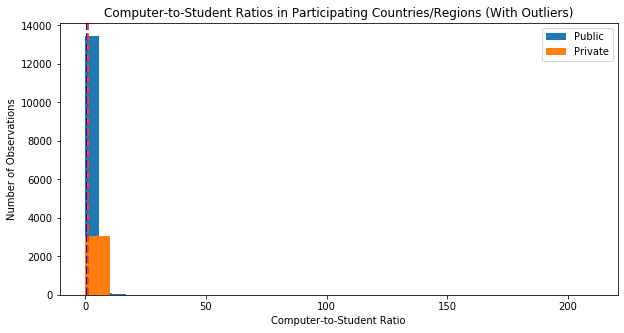

In [75]:
plt.figure(figsize = (10, 5))
plt.hist(public_school_df["Computer-to-Student Ratio"], 20, label = "Public")
plt.hist(private_school_df["Computer-to-Student Ratio"], 20, label = "Private")
plt.legend(loc = 'upper right')

plt.axvline(public_school_df["Computer-to-Student Ratio"].mean(), 
            color = 'blue', linestyle = 'dashed', linewidth = 2)
plt.axvline(private_school_df["Computer-to-Student Ratio"].mean(), 
            color = 'orangered', linestyle = 'dashed', linewidth = 2)

plt.xlabel("Computer-to-Student Ratio")
plt.ylabel("Number of Observations")
plt.title("Computer-to-Student Ratios in Participating Countries/Regions (With Outliers)")

plt.show()

This visualization is consonant with the computed summary statistics presented earlier, with public schools having a mean of  0.85 and private schools having a mean of 1.02. However, the noticeably high maximum values (specifically, 113.33 for public schools and 210.00 for private schools) evinced the presence of outliers, which may detract from the reliability of the data if these unadjusted values were to be used for further analysis, such as statistical inferencing.

As an example, the data of one such outlier was displayed. The observation is of a private school in South Korea with a computer-to-student ratio (represented as the value under the column `RATCMP1` in the table) of 210.0. Moreover, the school also reported a total of one student at the modal grade (the value under the column `SC004Q01TA`). 

In [76]:
school_id_outlier = pisa_analysis_df.loc[pisa_analysis_df['Computer-to-Student Ratio'] == 210, 'School ID'].values[0]
pisa_analysis_copy_df[pisa_analysis_copy_df['CNTSCHID'] == school_id_outlier]

,CNTSCHID,PRIVATESCH,RATCMP1,SC004Q01TA,SC004Q02TA,SC156Q03HA,SENWT,Country/Region,Average Score,RATCMP1_Validate
11145,41000104,private,210.0,1.0,210.0,1.0,14.42098,South Korea,519.7,210.0


Considering these values, it seemed suspect that 210 computers were allocated for one student at the said school. It seemed more likely that some sort of encoding error was committed when these values were provided; for instance, the 210 computers may have been the allocation for the entire modal grade, and the number of students may have been mistaken for a boolean input (e.g., whether or not there were eligible test-takers enrolled in the school) rather than an integer input. 

However, as no additional data about any of the schools was provided that could be used to confirm their enrollment details or material resources, there seems to be no method of imputation that could estimate these suspect values with sufficient confidence. Hence, the removal of outliers for both `DataFrames` was considered and was taken as the approach in this notebook.

### c) Outlier Removal

In order to preserve the original dataset, a copy of the dataset was prepared for the purposes of removing the outliers.

In [77]:
outliers_removed_df = pisa_analysis_df.copy()

The upper and lower fences of the data were computed. Specifically, the upper fence was computed as the value of the third quartile added to 1.5 times the interquartile range, while the lower fence was computed as the value of the first quartile subtracted by 1.5 times the interquartile range.

In [78]:
q3 = np.quantile(outliers_removed_df['Computer-to-Student Ratio'], 0.75)
q1 = np.quantile(outliers_removed_df['Computer-to-Student Ratio'], 0.25)
iqr = q3 - q1

upper_fence = q3 + 1.5 * iqr
lower_fence = q1 - 1.5 * iqr

fences = [["Upper Fence", upper_fence], ["Lower Fence", lower_fence]]
fences_df = pd.DataFrame(fences, columns = ['', 'Computer-to-Student Ratio'])
fences_df

,,Computer-to-Student Ratio
0,Upper Fence,2.09335
1,Lower Fence,-0.82225


All observations with values above the upper fence or values below the lower fence were then dropped. However, as the minimum value of the computer-to-student ratios is 0, there were no observations with values below the lower fence.

In [79]:
outliers_removed_df = outliers_removed_df.drop(outliers_removed_df[(outliers_removed_df['Computer-to-Student Ratio'] > upper_fence) | (outliers_removed_df['Computer-to-Student Ratio'] < lower_fence)].index)
outliers_removed_df

,School ID,School Type,Computer-to-Student Ratio,Digital Program,Senate Weight,Country/Region,Average Score
0,800004,public,0.0000,1,20.63480,Albania,419.7
1,800006,public,0.0256,1,45.40500,Albania,419.7
2,800007,public,0.1667,2,20.20900,Albania,419.7
3,800008,private,0.1791,1,3.10672,Albania,419.7
4,800009,public,0.4601,1,3.10672,Albania,419.7
...,...,...,...,...,...,...,...
16638,98300799,public,0.3879,2,8.04561,Russia,481.7
16640,98300803,public,1.6667,1,32.18244,Russia,481.7
16641,98300804,public,0.5556,1,32.18244,Russia,481.7
16642,98300805,public,1.4000,2,32.18244,Russia,481.7


After dropping the observations containing outliers, a separate `DataFrame` was again constructed, containing only data from public schools.

In [80]:
public_outliers_removed_df = outliers_removed_df[outliers_removed_df['School Type'] == 'public']
public_outliers_removed_df

,School ID,School Type,Computer-to-Student Ratio,Digital Program,Senate Weight,Country/Region,Average Score
0,800004,public,0.0000,1,20.63480,Albania,419.7
1,800006,public,0.0256,1,45.40500,Albania,419.7
2,800007,public,0.1667,2,20.20900,Albania,419.7
4,800009,public,0.4601,1,3.10672,Albania,419.7
6,800012,public,0.2750,2,10.68665,Albania,419.7
...,...,...,...,...,...,...,...
16638,98300799,public,0.3879,2,8.04561,Russia,481.7
16640,98300803,public,1.6667,1,32.18244,Russia,481.7
16641,98300804,public,0.5556,1,32.18244,Russia,481.7
16642,98300805,public,1.4000,2,32.18244,Russia,481.7


Another `DataFrame` was constructed containing only data from private schools.

In [81]:
private_outliers_removed_df = outliers_removed_df[outliers_removed_df['School Type'] == 'private']
private_outliers_removed_df

,School ID,School Type,Computer-to-Student Ratio,Digital Program,Senate Weight,Country/Region,Average Score
3,800008,private,0.1791,1,3.10672,Albania,419.7
5,800010,private,0.1791,1,3.10672,Albania,419.7
9,800017,private,0.4286,1,10.42754,Albania,419.7
11,800024,private,0.2807,1,8.11031,Albania,419.7
19,800059,private,0.7895,1,28.90362,Albania,419.7
...,...,...,...,...,...,...,...
16298,97500315,private,0.4403,1,4.81718,"China (Beijing, Shanghai, Jiangsu, Zhejiang)",578.7
16300,97500317,private,0.2773,1,8.14913,"China (Beijing, Shanghai, Jiangsu, Zhejiang)",578.7
16302,97500319,private,0.2933,1,10.33432,"China (Beijing, Shanghai, Jiangsu, Zhejiang)",578.7
16313,97500330,private,0.4154,1,5.34935,"China (Beijing, Shanghai, Jiangsu, Zhejiang)",578.7


### d) Adjusted Means

The summary statistics of the two `DataFrames` were again checked to evaluate the adjusted means without outliers. As seen in the table below, the maximum computer-to-student ratios for both public and private schools were much closer to their respective measures of central tendency. 

In [82]:
summary_stat = outliers_removed_df.groupby('School Type').agg({'Computer-to-Student Ratio': ['mean', 'median', 'std', 'max', 'min', len]})
summary_stat                                                                                      

Computer-to-Student Ratio                                        
                                 mean  median       std     max  min      len
School Type                                                                  
private                      0.752929  0.7282  0.456240  2.0741  0.0   2867.0
public                       0.601943  0.4938  0.454978  2.0870  0.0  12841.0

The adjusted `DataFrames` were again visualized as histograms; after removing the outliers, the remaining sets of data now appeared to follow bimodal distributions, with both public and private schools having two local maxima. Their first local maximum was estimated to occur at the range 0.1 to 0.2. Their second local maximum (which also happened to be their absolute or global maximum) was estimated to occur at the range 0.9 to 1.0. 

Despite their local maxima occurring at similar ranges, public schools had significantly higher frequencies for their local maxima (as well as for other points of the distribution) compared to private schools, indicating a notable difference in their sample sizes.

*A bimodal distribution refers to a distribution with two peaks, or local maxima (Glen, 2013). Despite its name, however,  the absolute maximum, representing the value with the highest frequency, is the only mode of the distribution.*

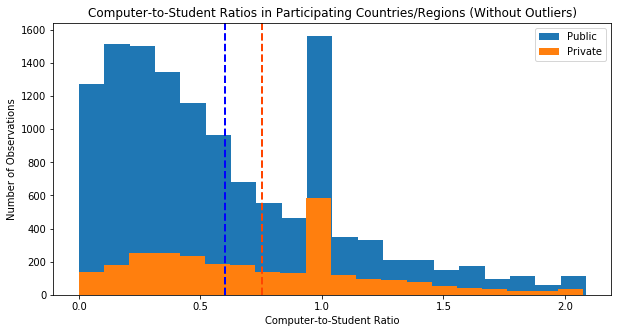

In [83]:
plt.figure(figsize = (10, 5))
plt.hist(public_outliers_removed_df["Computer-to-Student Ratio"], 20, label = "Public")
plt.hist(private_outliers_removed_df["Computer-to-Student Ratio"], 20, label = "Private")
plt.legend(loc = 'upper right')

plt.axvline(public_outliers_removed_df["Computer-to-Student Ratio"].mean(), 
            color = 'blue', linestyle = 'dashed', linewidth = 2)
plt.axvline(private_outliers_removed_df["Computer-to-Student Ratio"].mean(), 
            color = 'orangered', linestyle = 'dashed', linewidth = 2)

plt.xlabel("Computer-to-Student Ratio")
plt.ylabel("Number of Observations")
plt.title("Computer-to-Student Ratios in Participating Countries/Regions (Without Outliers)")

plt.show()

Having removed the outliers from the `DataFrames`, the exploratory data question can be answered. From the cleaned data, <b>the average number of available computers per student at the modal grade is 0.60 for public schools and 0.75 for public schools</b>.

## 2. Which countries/regions belonged to the (a) top 25% and (b) bottom 25% of the participating countries/regions in terms of average PISA scores?

Similar to other standardized assessments, the PISA, and specifically the PISA scores obtained by participating countries and regions, is often used as a measure of students' learning and their capability to solve real-life problems; in the case of the PISA, some countries also use the assessment to inform their policies on education reform (OECD, n.d.a). While studies often make use of the PISA scores for individual subjects, as they correlate to the skill levels of the students and the tasks related to the subjects that they can adequately perform, the average PISA scores may also be used to characterize the overall quality of education of a country or region in terms of reading, mathematics, and science. Hence, seeing how participating countries and regions rank when compared to one another allows for a descriptive overview of their relative states of high school education.

First, a boxplot was constructed as an initial visualization of the dispersion of the average PISA scores in the dataset. From the visualization, it can be seen that there are no outliers.

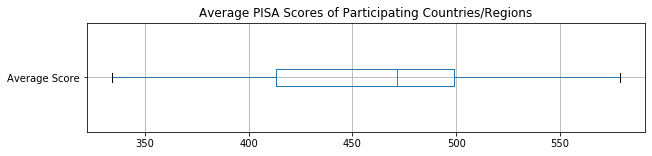

In [84]:
pisa_analysis_df.boxplot("Average Score", figsize = (10, 2), vert = False)
plt.title("Average PISA Scores of Participating Countries/Regions")
plt.show()

The precise values of the points of interest in the boxplot (specifically, the values of the first and third quartiles, the median, and the interquartile range) were computed and displayed. 

In [85]:
q3 = np.quantile(pisa_analysis_df['Average Score'], 0.75)
q2 = np.quantile(pisa_analysis_df['Average Score'], 0.5)
q1 = np.quantile(pisa_analysis_df['Average Score'], 0.25)
iqr = q3 - q1

measures = [["First Quartile", q1], ["Median", q2], ["Third Quartile", q3], ["Interquartile Range", iqr]]
measures_df = pd.DataFrame(measures, columns = ['', 'Average Score'])
measures_df

,,Average Score
0,First Quartile,413.3
1,Median,471.7
2,Third Quartile,499.0
3,Interquartile Range,85.7


### a) Dataset Preparation

Schools belonging to the same country share the same average PISA score, which led to many duplicate observations in the dataset. Hence, these duplicates were removed so that only one average PISA score per country was retained.

In [86]:
country_scores_df = pisa_analysis_df[['Country/Region', 'Average Score']]
country_scores_df = country_scores_df.drop_duplicates()
country_scores_df

,Country/Region,Average Score
0,Albania,419.7
120,Azerbaijan (Baku),402.3
215,Argentina,395.0
583,Australia,499.0
1243,Austria,491.0
...,...,...
15243,North Macedonia,400.0
15327,United Kingdom,503.7
15675,United States,495.0
15812,Uruguay,423.7


### b) Countries/Regions of Interest

In order to obtain a clearer image of the data, the ranks of the participating countries and regions according to their average PISA scores were also examined.

**COUNTRIES/REGIONS BELONGING TO THE TOP 25% IN TERMS OF AVERAGE PISA SCORES**

First, a sorted list of the top 25% of the countries and regions (those with average PISA scores equal to or above the 75<sup>th</sup> percentile) was obtained.

In [87]:
top_25_df = country_scores_df[country_scores_df['Average Score'] >= q3]
top_25_df = top_25_df.sort_values(by = 'Average Score', ascending = False)
top_25_df

,Country/Region,Average Score
15991,"China (Beijing, Shanghai, Jiangsu, Zhejiang)",578.7
12986,Singapore,556.3
10019,Macao,542.3
6323,"Hong Kong, China",530.7
4986,Estonia,525.3
7987,Japan,520.0
8983,South Korea,519.7
2494,Canada,516.7
3453,Taiwan,516.7
5209,Finland,516.3


The data from the above table was then visualized as a bar graph. 

As seen in the graph, almost all of the countries that obtained the top 25% of average PISA scores were either East Asian or European, with the exceptions of Singapore (the only Southeast Asian country), Canada (the only North American country) and Australia (the only Australian country). Moreover, the highest average PISA score was attained by China; specifically, the B-S-J-Z (Beijing, Shanghai, Jiangsu, Zhejiang) provinces that participated in the assessment. 

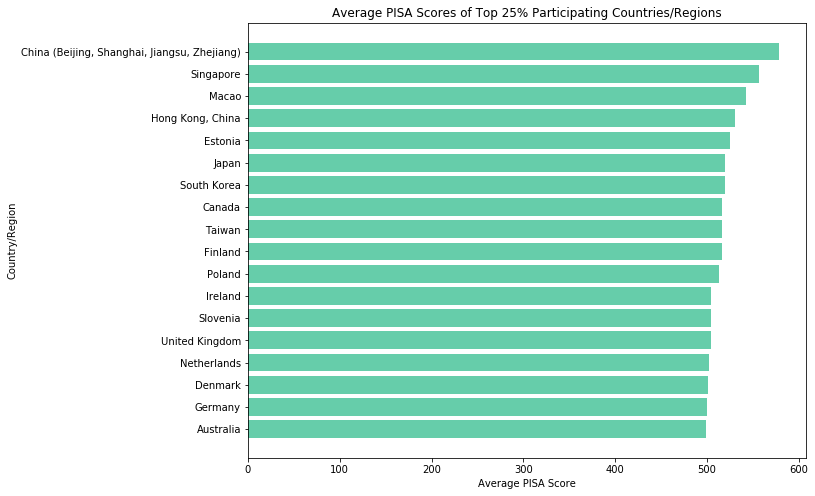

In [88]:
plt.figure(figsize = (10, 8))
top_25_df.sort_values(by = 'Average Score', ascending = True, inplace = True)
plt.barh(top_25_df['Country/Region'], top_25_df['Average Score'], color = 'mediumaquamarine')

plt.xlabel("Average PISA Score")
plt.ylabel("Country/Region")
plt.title("Average PISA Scores of Top 25% Participating Countries/Regions")

plt.show()

**COUNTRIES/REGIONS BELONGING TO THE BOTTOM 25% IN TERMS OF AVERAGE PISA SCORES**

A sorted list of the bottom 25% of the countries and regions (those with average PISA scores below the 25<sup>th</sup> percentile) was also obtained.

In [89]:
bottom_25_df = country_scores_df[country_scores_df['Average Score'] < q1]
bottom_25_df = bottom_25_df.sort_values(by = 'Average Score', ascending = False)
bottom_25_df

,Country/Region,Average Score
13977,Thailand,412.7
3632,Colombia,405.3
120,Azerbaijan (Baku),402.3
8170,Kazakhstan,402.3
1507,Bosnia and Herzegovina,402.3
11178,Peru,401.7
1627,Brazil,400.3
15243,North Macedonia,400.0
215,Argentina,395.0
5608,Georgia,387.0


The data from the above table was then visualized as a bar graph.

As seen in the graph, majority of the countries with the bottom 25% of average PISA scores were situated in Asia and South America. The Dominican Republic attained the lowest score out of the 72 participating countries and regions, with an average PISA score of 334.3. This was followed by the second-lowest average score of 350.0 obtained by the Philippines.

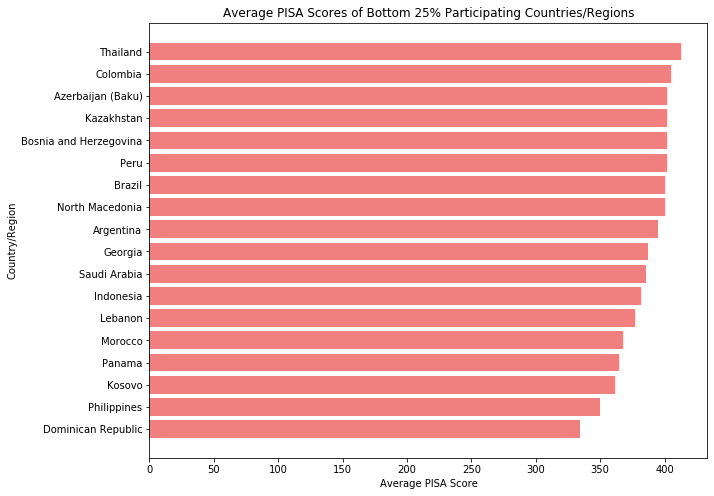

In [90]:
plt.figure(figsize = (10, 8))
bottom_25_df.sort_values(by = 'Average Score', ascending = True, inplace = True)
plt.barh(bottom_25_df['Country/Region'], bottom_25_df['Average Score'], color = 'lightcoral')

plt.xlabel("Average PISA Score")
plt.ylabel("Country/Region")
plt.title("Average PISA Scores of Bottom 25% Participating Countries/Regions")

plt.show()

### c) Bar Graph of All the Countries

Finally, to gain a complete and proper perspective of the assessment results as a whole, a bar graph containing the average PISA scores of all participating countries and regions was constructed.

The blue bars on the graph represent the average PISA scores of the middle 50% of the participants (i.e., countries and regions with scores above the 25<sup>th</sup> percentile but below the 75<sup>th</sup> percentile); these data, covering the first to the third quartiles, correspond to the box of the initially constructed boxplot.

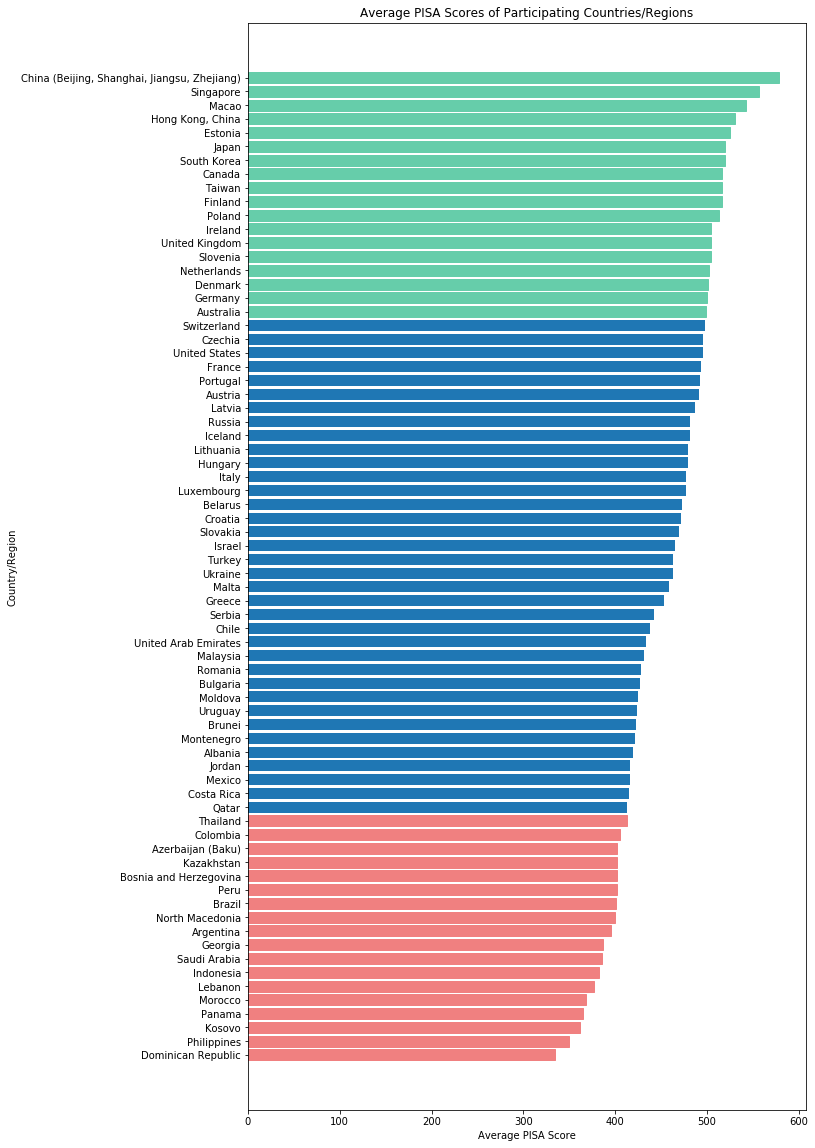

In [91]:
plt.figure(figsize = (10, 20))
country_scores_df.sort_values(by = 'Average Score', ascending = True, inplace = True)
fig = plt.barh(country_scores_df['Country/Region'], country_scores_df['Average Score'])

for i in range(0, 18):
    fig[i].set_color('lightcoral')

for i in range(54, 72):
    fig[i].set_color('mediumaquamarine')
    
plt.xlabel("Average PISA Score")
plt.ylabel("Country/Region")
plt.title("Average PISA Scores of Participating Countries/Regions")
    
plt.show()

Meanwhile, <b>the bar graphs of the countries and regions with the top 25% of the average PISA scores are shaded blue-green, and are as follows</b> (in descending order of their average PISA scores): 
- China (B-J-S-Z)
- Singapore
- Macao
- Hong Kong, China
- Estonia
- Japan
- South Korea
- Canada
- Taiwan
- Finland
- Poland
- Ireland
- United Kingdom
- Slovenia
- Netherlands
- Denmark
- Germany
- Australia

Finally, <b>the bar graphs of the countries and regions with the bottom 25% of the average PISA scores are shaded pink, and are as follows</b> (in descending order of their average PISA scores): 
- Thailand
- Colombia
- Azerbaijan (Baku)
- Kazakhstan
- Bosnia and Herzegovina
- Peru
- Brazil
- North Macedonia
- Argentina
- Georgia
- Saudi Arabia
- Indonesia
- Lebanon
- Morocco
- Panama
- Kosovo
- Philippines
- Dominican Republic

## 3. Is there a correlation between the average number of available computers per student at the modal grade of a country/region and the PISA score obtained by the country/region?

As previously mentioned, the availability of technology for student use in a school may be an indicator of the quality of education provided to its students, due to the many advantages of technology in education. In turn, the results of assessments such as the PISA are expected to reflect the quality of education of their participants. 

Hence, determining whether there is a correlation between the average computer-to-student ratio of a country or region and the PISA score obtained by its representative students may confirm these assumptions and further motivate the inclusion of technology in the classroom as part of educational reform.

### a) Dataset Preparation

First, the average computer-to-student ratio of each country was computed. As stated in the PISA data analysis guidelines (OECD, n.d.b), samples were drawn in a matter that would minimize biases and maximize precision in view of the limited resources available to the participating countries and regions. Hence, analyses of the PISA data must be weighted in order to account for these sampling techniques; in particular, the OECD recommends the use of the provided senate weights in order to ensure that each country would contribute equally to the data analysis. The use of these senate weights when "countries form the unit of analysis" is also consonant with the recommendations of Jerrim, Lopez-Agudo, Marcenaro-Gutierrez, and Shure (2017).

On a technical note, a lambda function, which uses the <a href = "https://numpy.org/doc/stable/reference/generated/numpy.average.html">`np.average`</a> function, was written to compute the weighted average. The averages were then stored in a `DataFrame`.

In [92]:
country_ratcmp = outliers_removed_df.groupby('Country/Region').apply(lambda grp: np.average(grp['Computer-to-Student Ratio'], weights = grp['Senate Weight']))
country_ratcmp_df = pd.DataFrame(country_ratcmp.reset_index())
country_ratcmp_df = country_ratcmp_df.rename(columns = {0: 'Average Computer-to-Student Ratio'})

country_ratcmp_df

,Country/Region,Average Computer-to-Student Ratio
0,Albania,0.245129
1,Argentina,0.357112
2,Australia,1.015976
3,Austria,0.927757
4,Azerbaijan (Baku),0.598764
...,...,...
67,Ukraine,0.804926
68,United Arab Emirates,0.869218
69,United Kingdom,1.231787
70,United States,1.005364


The obtained data was merged with the average PISA scores of the 72 participating countries and regions.

In [93]:
country_ratcmp_score_df = country_ratcmp_df.merge(country_scores_df)
country_ratcmp_score_df

,Country/Region,Average Computer-to-Student Ratio,Average Score
0,Albania,0.245129,419.7
1,Argentina,0.357112,395.0
2,Australia,1.015976,499.0
3,Austria,0.927757,491.0
4,Azerbaijan (Baku),0.598764,402.3
...,...,...,...
67,Ukraine,0.804926,462.7
68,United Arab Emirates,0.869218,433.7
69,United Kingdom,1.231787,503.7
70,United States,1.005364,495.0


### b) Conditions

Two values were used to measure the correlation between the two specified variables: Spearman's rank-order correlation and Pearson's product-moment correlation. 

Before proceeding, the data was confirmed to have met all the conditions necessary for using Spearman's correlation (Laerd Statistics, 2018): 
- The two variables of interest (namely, the average computer-to-student ratio and PISA scores) were both continuous. 
- The data used were paired observations, as each average computer-to-student ratio corresponded to its respective country's PISA score.

Additionally, the data also fulfilled most of the conditions for using Pearson's correlation (Kent State University, 2021a):  
- The two variables of interest were both continuous. 
- There were no outliers or missing values for either of the variables. 
- As discussed in the previous sections, the data collection methods of the OECD ensured that the observations involved were independent of one another and that samples were taken randomly. 

While some sources mention that Pearson's correlation can still be used for non-normal distributions, it has been noted to yield inaccuracies in some cases of non-normality (Kowalski, 1972). 

### c) Data Visualizations

To confirm that Spearman's and Pearson's correlations can be applied to the data, the range of average computer-to-student ratios was visualized using a histogram.

As can be seen below, the data appeared to follow a normal distribution, with its mode located at the range of 0.6 to 0.7. Moreover, there were no observable outliers in the data.

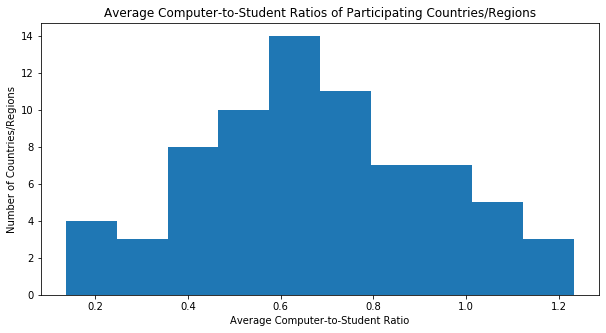

In [94]:
plt.figure(figsize = (10, 5))
plt.hist(country_ratcmp_score_df['Average Computer-to-Student Ratio'], 10)

plt.xlabel("Average Computer-to-Student Ratio")
plt.ylabel("Number of Countries/Regions")
plt.title("Average Computer-to-Student Ratios of Participating Countries/Regions")

plt.show()

The range of average PISA scores was also visualized as a histogram. However, unlike the distribution for the average computer-to-student ratios, the PISA scores appeared to follow a bimodal distribution, with a local maximum at around the range of 410 to 430 and an absolute maximum (i.e., its mode) at around the range of 480 to 500. There were also no observable outliers in the data. However, as the distribution of average PISA scores is non-normal, using Pearson's correlation to establish the relationship between the two variables may not be fully reliable.  

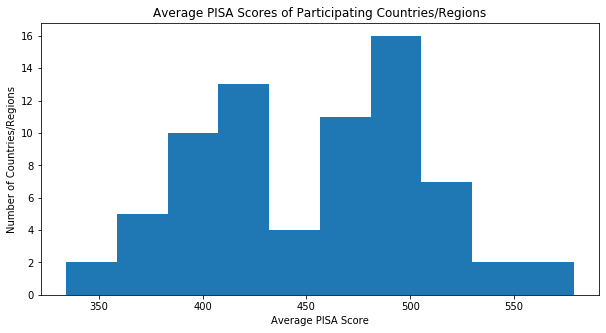

In [95]:
plt.figure(figsize = (10, 5))
plt.hist(country_ratcmp_score_df['Average Score'], 10)

plt.xlabel("Average PISA Score")
plt.ylabel("Number of Countries/Regions")
plt.title("Average PISA Scores of Participating Countries/Regions")

plt.show()

### d) Correlation

The Spearman's correlation coefficient between the average computer-to-student ratios and PISA scores of participant countries and regions revealed a moderate monotonically increasing relationship between the two variables, with a Spearman's *&rho;* coefficient of about 0.53. However, it must be noted that Spearman's correlation only tests for monotonicity (unlike Pearson's *r*, it does not test for linearity). 

In [96]:
scipy.stats.spearmanr(country_ratcmp_score_df['Average Computer-to-Student Ratio'], country_ratcmp_score_df['Average Score'])

SpearmanrResult(correlation=0.5285567286466157, pvalue=1.8207051476205282e-06)

Similarly, the Pearson's correlation coefficient yielded a similar value (0.53), indicating a moderate positive linear correlation between the two variables. However, as stated previously, Pearson's *r* may not always be accurate for non-normal distributions. Thus, it was important to have a confirmation of this positive linear correlation through a supporting data visualization.

In [97]:
scipy.stats.pearsonr(country_ratcmp_score_df['Average Computer-to-Student Ratio'], country_ratcmp_score_df['Average Score'])

(0.5300630893171722, 1.6804877882720403e-06)

A scatterplot was created to better examine the relationship between the two variables. As reported by the Pearson's *r* coefficient, the data appear to be positively linearly correlated to a moderate degree. The scatterplot also supports the moderate monotonically increasing relationship reported by the Spearman's *&rho;* coefficient.

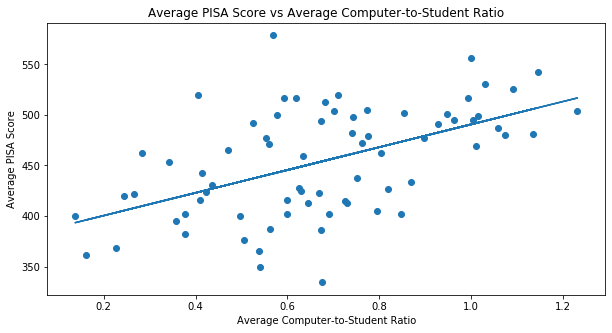

In [98]:
m, b = np.polyfit(country_ratcmp_score_df['Average Computer-to-Student Ratio'], country_ratcmp_score_df['Average Score'], 1)

plt.figure(figsize = (10, 5))
plt.scatter(country_ratcmp_score_df['Average Computer-to-Student Ratio'], country_ratcmp_score_df['Average Score'])
plt.plot(country_ratcmp_score_df['Average Computer-to-Student Ratio'], m * country_ratcmp_score_df['Average Computer-to-Student Ratio'] + b)

plt.xlabel("Average Computer-to-Student Ratio")
plt.ylabel("Average PISA Score")
plt.title("Average PISA Score vs Average Computer-to-Student Ratio")

plt.show()

While the information returned from Pearson's correlation may not be wholly reliable due to the bimodal distribution of the average PISA scores, the result of Spearman's correlation and the created scatterplot both confirm the existence of a **moderate positive correlation between the average number of available computers per student at the modal grade of a country or region and the average PISA score obtained by the country or region**.

<hr>

# RESEARCH QUESTIONS & STATISTICAL INFERENCE

## 1. Is the number of available computers per student at the modal grade (average computer-to-student ratio) in public schools significantly different compared to the average computer-to-student ratio in private schools?

From the results of the first exploratory data analysis (EDA) question (i.e., the comparison of average computer-to-student ratios between public and private schools), it was found that, despite the difference in the sample sizes of the two categories, the average ratios for both public and private schools appeared to be bimodal, with their two local maxima also located within the same ranges. Hence, it was imperative to conduct further analysis to determine whether there was a statistically significant difference between the average computer-to-student ratios of both types of schools. At face value, the computed mean for the average computer-to-student ratios of private schools was higher than that of public schools; however, the point of interest lies in whether this difference in means is *statistically significant.*

Given the positive correlation between average computer-to-student ratios and PISA scores, the increased availability of technology for student use appears to be beneficial to their education. This observation is supported by studies that claim that the use of devices such as computers and tablets help students gain the skills they need to tackle real-life issues in the current milieu (American University, 2020; Walden University, 2021). However, several sources have raised awareness towards the lack of funding for technological resources among schools in different regions of the world (Pandolfo, 2012; CNN Philippines, 2020; Ovide, 2020); specifically, these studies focus on the insufficient funding provided for public schools. 

Hence, determining whether there is a significant difference between the average number of computers available for public schools, which have publicized issues regarding access to technology, and private schools, the funding details of which are often unavailable to the general public due to their nature as private institutions, may prove informational. If a difference were found between their respective average computer-to-student ratios, further statistical analyses may be performed in order to confirm whether public schools are provided with less resources compared to private schools and whether this disparity does affect the students' quality of education. Ultimately, this line of inquiry may encourage school administrators and stakeholders to reconsider school budget allocations and provide adequate focus towards the provision of technological resources for student use.

To answer the research question, a two-tailed t-test on unpaired observations was conducted, with the following hypotheses:

$H_{0}$ : There is no significant difference between the average computer-to-student ratios of public schools and private schools.

$H_{A}$: There is a significant difference between the average computer-to-student ratios of public schools and private schools.

### a) Summary Statistics

First, the summary statistics (mean, median, standard deviation, maximum and minimum values, and number of observations) of the relevant data were computed and displayed. For this analysis, the previously prepared `DataFrame` with the outliers removed was used as a measure to prevent erratic behavior during the hypothesis testing, especially since means are known to be nonrobust and sensitive to outliers.

In order to perform the *t*-test, the data was confirmed to fulfill the conditions of the Central Limit Theorem (LaMorte, 2016):
- The data collection methods of the OECD ensured that random samples were taken, and the data set contains independent observations (i.e., the occurrence of a particular school entry does not affect the probability of the occurrence of another).
- The sample size was sufficiently large (more than the minimum required sample size of 30 observations), as the dataset contains over 15000 observations. 

Moreover, further preprocessing of the relevant data was no longer required, as the dataset was already preprocessed in the earlier parts of the notebook in order to answer the EDA questions.

In [99]:
summary_stat = outliers_removed_df.groupby('School Type').agg({'Computer-to-Student Ratio': ['mean', 'median', 'std', 'max', 'min', len]})
summary_stat                                                                                      

Computer-to-Student Ratio                                        
                                 mean  median       std     max  min      len
School Type                                                                  
private                      0.752929  0.7282  0.456240  2.0741  0.0   2867.0
public                       0.601943  0.4938  0.454978  2.0870  0.0  12841.0

### b) Hypothesis Testing

The difference between the average computer-to-student ratios of private schools and public schools was obtained in order to perform a two-tailed test.

In [100]:
private_mean = summary_stat.loc['private'].loc['Computer-to-Student Ratio'].loc['mean']
public_mean = summary_stat.loc['public'].loc['Computer-to-Student Ratio'].loc['mean']

diff = private_mean - public_mean
print('{:.2f}'.format(diff))

0.15


The <a href = "https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html">`ttest_ind()`</a> function of the <a href="https://docs.scipy.org/doc/scipy/reference/stats.html">`scipy.stats`</a> module was used to perform the *t*-test. Specifically, a two-tailed *t*-test without the assumption of equal variances was performed.

In [101]:
scipy.stats.ttest_ind(outliers_removed_df[outliers_removed_df['School Type'] == 'private']['Computer-to-Student Ratio'],
                      outliers_removed_df[outliers_removed_df['School Type'] == 'public']['Computer-to-Student Ratio'],
                      equal_var = False)

Ttest_indResult(statistic=16.02926799645062, pvalue=3.487043977339504e-56)

As indicated above, the *t*-test yielded a *p*-value of 3.49 × 10<sup>&ndash;56</sup>; using a significance level of 0.05, this *p*-value led to the rejection of the null hypothesis. The following conclusion can, thus, be drawn:

**Since the *p*-value (3.49 × 10<sup>&ndash;56</sup>) is less than the significance level (0.05), the data provided strong evidence that there is a significant difference between the average computer-to-student ratios of public schools and private schools at a significance level of 5%.**

As previously stated, this conclusion becomes germane when the correlation between technological resources for student use and the students' educational performance is considered. Apart from the aforementioned studies that similarly point out this correlation, related conclusions were also drawn from other analyses on the same dataset; for instance, in the PISA result report of the OECD (2020a), they claimed that countries or regions with fewer shortages of material resources performed better on the assessment. 

Primarily, the statistical analysis served to provide an informational overview of the state of the availability of technological resources for student use as evident in the dataset. As a disparity between this availability for public and private schools has been revealed, it also serves as a motivation to conduct more detailed analyses on these data and their implications. For instance, one-tailed tests can be used to confirm whether public schools have significantly less or significantly more resources compared to private schools. Additionally, if the PISA scores of each of the participating schools were made available, the difference between the PISA scores of public and private schools can be analyzed to conclusively confirm the claims made by the aforementioned studies and analyses. Ultimately, this conclusion may also serve as a motivation for countries and regions worldwide to bridge the gap between the availability of technological resources of their public and private schools and improve the education they provide for their students.

## 2. Is there a significant difference in the PISA score groups between countries where more than half of their schools have programs for using digital devices in teaching and learning and countries where not greater than half of their schools have such programs?

Apart from the availability of technological resources, the introduction of technology in the classroom is also influenced by school policies concerning the use of these devices themselves; after all, even if a school were to have an adequate amount of technological resources, students would still be unable to benefit from them if the school did not have the proper programs and measures to make use of these resources in teaching. 

Rather than comparing the PISA scores of these two groups outright, however, a more detailed picture of the data can be obtained by classifying the obtained scores into strata that would characterize the relative performance levels of the participating countries and regions. Sufficient precedence for such classifications can be found in the design of the PISA itself, as the OECD characterizes the performance of participating students in terms of proficiency scales, where a range of PISA scores is associated with a set of skills and tasks students are expected to be able to accomplish without difficulty (OECD, 2020b). 

For this research question, the participating countries and regions were classified into the strata used for the second exploratory data analysis (EDA) question (i.e., the top 25%, bottom 25%, and middle 50% of the PISA scores); however, the middle 50% was further divided into the second and third 25% of PISA scores in order to have an equal division of groups. The use of these classifications was motivated by the answers to the second and third EDA questions. From the second EDA question, the countries with the top 25% of average PISA scores were mostly progressive countries, such as those in East Asia and parts of Europe; on the other hand, the countries with the bottom 25% of average PISA scores were mostly third-world countries, namely those in Southeast Asia and South America. Given the positive correlation between technological resources and average PISA scores revealed by the third EDA question, and the fact that progressive countries tend to be more advanced in terms of using technology in everyday life as compared to third-world countries, it was interesting to determine whether other facets of the usage of technology for learning, such as the presence of programs that regulate the use of digital devices for education, would also have an effect on the average PISA scores of the participating countries and regions.

If countries belonging to these two categories (i.e., countries and regions where more than half of their schools have the relevant programs and countries where not more than half have them) do not have the same relative "spread" of PISA scores, this information would further cement the correlation between the availability of administrative measures towards the use of technology in the classroom and student performance. Similar to the first research question, if a significant difference were to be found, further statistical analyses can be conducted to determine whether countries belonging to the second group performed better or worse compared to countries belonging to the first group. All in all, this set of analyses aims to encourage school administrators and stakeholders to reevaluate their current policies regarding the use of technology in the classroom and to motivate them to strive for fully incorporating the use of digital devices for teaching and learning. 

To answer the research question, a chi-square test on a two-way table was conducted, with the following hypotheses:

$H_{0}$ : There is no significant difference between the PISA score groups of countries and regions where more than half of their participating schools have digital programs and those where not more than half of their participating schools have the said programs.

$H_{A}$: There is a significant difference between the PISA score groups of countries and regions where more than half of their participating schools have digital programs and those where not more than half of their participating schools have the said programs.

### a) Dataset Preparation

Before conducting the chi-square test itself, the dataset was confirmed to meet the conditions required for the test (Kent State University, 2021b): 
- Both of the variables involved (the classifications of the countries according to their PISA performances and the availability of programs for digital devices in their schools) were readily represented as categorical variables. 
- There are at least two categories for each variable, as the score groups comprised four categories while the availability of programs for digital devices comprised two categories. 
- The observations were independent of one another, as they were sampled randomly and were not paired in any way. The occurrence of an observation does not affect the probability of the occurrence of another.
- Each of the eight resultant groups is composed of more than five observations, as displayed in the <b>Counts</b> section below.

**PISA PERFORMANCE LEVELS**

First, a function was written to classify the participating countries and regions into the four score groups (i.e., "First 25%", "Second 25%", "Third 25%", and "Bottom 25%") based on the values of the quartiles computed to answer the second EDA question.

In [102]:
def label_group(row):
    if row['Average Score'] >= q3:
        return 'First 25%'
    if q3 > row['Average Score'] >= q2:
        return 'Second 25%'
    if q2 > row['Average Score'] >= q1:
        return 'Third 25%'
    
    return 'Bottom 25%'

A new column containing the score group of each country or region was added to the `DataFrame`; as the `DataFrame` contains observations on an individual school level rather than on a national or regional level, all schools that are part of the same country or region also fall under the same score group.



In [103]:
pisa_analysis_df['Score Group'] = pisa_analysis_df.apply(lambda row: label_group(row), axis = 1)
pisa_analysis_df

,School ID,School Type,Computer-to-Student Ratio,Digital Program,Senate Weight,Country/Region,Average Score,Score Group
0,800004,public,0.0000,1,20.63480,Albania,419.7,Third 25%
1,800006,public,0.0256,1,45.40500,Albania,419.7,Third 25%
2,800007,public,0.1667,2,20.20900,Albania,419.7,Third 25%
3,800008,private,0.1791,1,3.10672,Albania,419.7,Third 25%
4,800009,public,0.4601,1,3.10672,Albania,419.7,Third 25%
...,...,...,...,...,...,...,...,...
16639,98300802,public,4.5000,2,32.18244,Russia,481.7,Second 25%
16640,98300803,public,1.6667,1,32.18244,Russia,481.7,Second 25%
16641,98300804,public,0.5556,1,32.18244,Russia,481.7,Second 25%
16642,98300805,public,1.4000,2,32.18244,Russia,481.7,Second 25%


***Sanity Check***

To confirm the integrity of the data after adding the score groups to the `DataFrame`, the pairwise intersections between the groups and the total number of countries and regions across all the groups were computed and displayed. No pairwise intersections emerged, indicating that each country or region was assigned only one score group. Moreover, the total number of countries and regions was 72, consistent with the total number of countries and regions present in the cleaned dataset. 

This sanity check evinced that the categorization partitioned the countries/regions. Note that the non-overlapping of the categories of the variables is also one of the requirements to perform chi-square analysis (Kent State University, 2021b). 

In [104]:
first = set(pisa_analysis_df[pisa_analysis_df['Score Group'] == 'First 25%']['Country/Region'])
second = set(pisa_analysis_df[pisa_analysis_df['Score Group'] == 'Second 25%']['Country/Region'])
third = set(pisa_analysis_df[pisa_analysis_df['Score Group'] == 'Third 25%']['Country/Region'])
bottom = set(pisa_analysis_df[pisa_analysis_df['Score Group'] == 'Bottom 25%']['Country/Region'])

print("CARDINALITIES")

groups = [first, second, third, bottom]
for i in range(len(groups) - 1):
    for j in range(i + 1, len(groups)):
        print("Pairwise Intersection:", len(groups[i].intersection(groups[j])))

print("Union of all groups:" , len(first) + len(second) + len(third) + len(bottom))

CARDINALITIES
Pairwise Intersection: 0
Pairwise Intersection: 0
Pairwise Intersection: 0
Pairwise Intersection: 0
Pairwise Intersection: 0
Pairwise Intersection: 0
Union of all groups: 72


**PROGRAMS FOR USING DIGITAL DEVICES IN TEACHING AND LEARNING**

Next, the classifications of the participating countries and regions according to the availability of programs for using digital devices in teaching and learning among their schools were determined. To do so, the mode of the availability of these programs among schools (i.e., whether or not each school had such programs in place) in each country was used.

In [105]:
digital_df = pisa_analysis_df.groupby(['Country/Region'])['Digital Program'].agg(pd.Series.mode).to_frame()
digital_df = digital_df.rename(columns = {'Digital Program': 'Country Digital Program'})
digital_df

,Country Digital Program
Country/Region,
Albania,1
Argentina,2
Australia,1
Austria,1
Azerbaijan (Baku),2
...,...
Ukraine,1
United Arab Emirates,1
United Kingdom,1


From this treatment of the data, countries and regions with an equal number of schools with and without such digital programs would yield two modes. Hence, it was necessary to check for unimodality by determining whether there were countries or regions that did not have a value of just `1` or just `2` (the values used to represent the classifications) under the `Country Digital Program` column. 

In [106]:
digital_df['Country Digital Program'].unique()

array([1, 2])

As all countries and regions were assigned values of either `1` or `2`, no further data processing was necessary.

***Integrating into the Dataset***

Finally, the `Country Digital Program` column was added to the dataset. The `how` parameter of the <a href = "https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html">`merge()`</a> function was set to `left` (equivalent to the left outer join in SQL) used as an additional measure to ensure that schools without a corresponding value under the `Country Digital Program` column would be removed from the dataset in order to avoid errors during the statistical analysis. Nevertheless, the data processing steps performed already above indicated that there were no such observations.

In [107]:
pisa_analysis_df = pisa_analysis_df.merge(digital_df, left_on = 'Country/Region', right_on = 'Country/Region', how = 'left')
pisa_analysis_df

,School ID,School Type,Computer-to-Student Ratio,Digital Program,Senate Weight,Country/Region,Average Score,Score Group,Country Digital Program
0,800004,public,0.0000,1,20.63480,Albania,419.7,Third 25%,1
1,800006,public,0.0256,1,45.40500,Albania,419.7,Third 25%,1
2,800007,public,0.1667,2,20.20900,Albania,419.7,Third 25%,1
3,800008,private,0.1791,1,3.10672,Albania,419.7,Third 25%,1
4,800009,public,0.4601,1,3.10672,Albania,419.7,Third 25%,1
...,...,...,...,...,...,...,...,...,...
16639,98300802,public,4.5000,2,32.18244,Russia,481.7,Second 25%,2
16640,98300803,public,1.6667,1,32.18244,Russia,481.7,Second 25%,2
16641,98300804,public,0.5556,1,32.18244,Russia,481.7,Second 25%,2
16642,98300805,public,1.4000,2,32.18244,Russia,481.7,Second 25%,2


***Sanity Check***

Two more random checks were performed to confirm that the data were represented as expected. First, data on a country with majority of its schools having programs for digital devices (the United States) was displayed. As expected, the values under the `Digital Program` column of its schools were only either `1` (indicating the availability of programs for digital devices) or `2` (indicating the absence of programs for digital devices).

In [108]:
us_df = pisa_analysis_df[pisa_analysis_df['Country/Region'] == 'United States']
us_df['Digital Program'].value_counts()

1    98
2    39
Name: Digital Program, dtype: int64

Another check was performed on a country with majority of its schools not having programs for digital devices (Argentina). Similarly, the values under the `Digital Program` column of its schools were only either `1` or `2`.

In [109]:
argentina_df = pisa_analysis_df[pisa_analysis_df['Country/Region'] == 'Argentina']
argentina_df['Digital Program'].value_counts()

2    232
1    136
Name: Digital Program, dtype: int64

### b) Hypothesis Testing

The number of observations for each of the eight resultant groups was displayed. As required for the chi-square test, each group was composed of at least five observations.

In [110]:
counts = pisa_analysis_df.groupby('Country Digital Program')['Score Group'].value_counts()
counts

Country Digital Program  Score Group
1                        First 25%      3409
                         Third 25%      2388
                         Bottom 25%     1583
                         Second 25%      760
2                        Second 25%     3029
                         Bottom 25%     2488
                         Third 25%      1748
                         First 25%      1239
Name: Score Group, dtype: int64

The above counts were then converted into a tabular format for use in the chi-square test.

In [111]:
table = pd.DataFrame([counts[1], counts[2]], index=["More than Half with Digital Program", "Not Greater than Half with Digital Program"]).transpose()
table

,More than Half with Digital Program,Not Greater than Half with Digital Program
First 25%,3409,1239
Third 25%,2388,1748
Bottom 25%,1583,2488
Second 25%,760,3029


Finally, the <a href = "https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html">`chi2_contingency()`</a> function of the <a href="https://docs.scipy.org/doc/scipy/reference/stats.html">`scipy.stats`</a> module was used to perform the chi-square test. 

In [112]:
scipy.stats.chi2_contingency(table)

(2665.399849764629,
 0.0,
 3,
 array([[2273.17471762, 2374.82528238],
        [2022.77337179, 2113.22662821],
        [1990.98413843, 2080.01586157],
        [1853.06777217, 1935.93222783]]))

As seen from the second return value of the function, the computed *p*-value was too small to be displayed by the floating-point data type used by `scipy` (which can only handle up to 2.225 &times; 10<sup>&ndash;308</sup>, following the IEEE754 specifications [Kong, Siauw & Bayen, 2020]), hence the display value of 0.0. Using a significance level of 0.05, this *p*-value led to the rejection of the null hypothesis. The following conclusion can, thus, be drawn:

**Since the *p*-value (< 2.225 &times; 10<sup>&ndash;308</sup>) is less than the significance level (0.05), the data provided strong evidence that there is a significant difference in the PISA score groups between countries and regions where more than half of their participating schools have programs for using digital devices in teaching and learning, and countries and regions where not more than half of their participating schools have such programs, at a significance level of 5%**.

Similar to the first research question, this conclusion underscores the importance of using technology in the classroom to improve the quality of education provided for students. As highlighted in an OECD study on the same dataset (2020c), students enrolled in schools were teachers have adequate expertise in the use of technology as a pedagogical tool, as well as schools where the students themselves are taught how to use relevant software to supplement their education, performed higher on the reading portion of the PISA.

Having established the differences between the PISA score groups of countries with more programs for using digital devices as pedagogical tools and countries with less such programs, more specific analyses can be conducted to further explore the topic and confirm the correlations that have been raised from this preliminary analysis. For example, the claim that students learn better when they are enrolled in schools that promote the use of education in the classroom can be confirmed by performing one-tailed tests on the same data. 

Moreover, as the PISA scores of the individual schools in the dataset were not made available, the current analysis was limited to scores at a national level; obtaining data on the PISA scores obtained by the participating schools could allow for more detailed analyses that would accommodate much larger proportions of the available data. In all, this conclusion may also motivate education policy makers to focus not only on procuring the technology and digital devices themselves, but also on ensuring that students, teachers, and administrators are equipped and encouraged to properly use these devices for teaching and learning alike.

<hr>

# REFERENCES

- Allcock, J.B., Lampe, J.R., & Young, A. (2021, April 7). *Kosovo*. Encyclopaedia Britannica. https://www.britannica.com/place/Kosovo/

- American University. (2020, June 25). *How important is technology in education? Benefits, challenges, and impact on students*. https://soeonline.american.edu/blog/technology-in-education

- CNN Philippines. (2020, June 11). *Digital divide, lack of funding, among concerns of remote learning approach*. https://cnnphilippines.com/news/2020/6/11/PH-online-education-blended-learning-concerns.html

- *The Constitution of the Russian Federation.* (1993). https://publicofficialsfinancialdisclosure.worldbank.org/sites/fdl/files/assets/law-library-files/Russian%20Federation_Constitution_1993_EN.pdf

- Glen, S. (2013, July 29). *Bimodal distribution: What is it?* Statistics How To. https://www.statisticshowto.com/what-is-a-bimodal-distribution/

- Jerrim, J., Lopez-Agudo, L.A., Marcenaro-Gutierrez, O.D., & Shure, N. (2017). To weight or not to weight? The case of PISA data. In J.C.G. Gallego, M.C.P. Cárceles, & L.N. Torrejón (Eds.), *Investigaciones de Economía de la Educación.* Asociación de Economía de la Educación.  

- Kent State University. (2021a). *SPSS tutorials: Pearson correlation*. https://libguides.library.kent.edu/SPSS/PearsonCorr

- Kent State University. (2021b). *SPSS tutorials: Chi-square test of independence*. https://libguides.library.kent.edu/spss/chisquare 

- Kong, Q., Siauw, T., & Bayen, A. (2020). *Python programming and numerical methods: A guide for engineers and scientists* (1st ed.). Elsevier Academic Press.

- Kowalski, C.J. (1972). On the effects of non-normality on the distribution of the sample product-moment correlation coefficient. *Applied Statistics, 21*(1). doi:10.2307/2346598

- Laerd Statistics. (2018). *Spearman's rank-order correlation using SPSS statistics*. https://statistics.laerd.com/spss-tutorials/spearmans-rank-order-correlation-using-spss-statistics.php

- LaMorte, W.W. (2016, July 24). *Central limit theorem*. Boston University School of Public Health. https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_probability/BS704_Probability12.html

- National Center for Education Statistics. (n.d.). *Program for international student assessment frequently asked questions*. https://nces.ed.gov/surveys/pisa/faq.asp

- Organisation for Economic Co-operation and Development. (n.d.a). *What is PISA?* https://www.oecd.org/pisa/

- Organisation for Economic Co-operation and Development. (n.d.b). *How to prepare and analyse the PISA database*. https://www.oecd.org/pisa/data/httpoecdorgpisadatabase-instructions.htm

- Organisation for Economic Co-operation and Development. (2016). *PISA 2015 codebook* https://www.oecd.org/pisa/data/2015database/Codebook_CM2.xlsx

- Organisation for Economic Co-operation and Development. (2017). *School questionnaire for PISA 2018: Main survey version*. https://www.oecd.org/pisa/data/2018database/CY7_201710_QST_MS_SCQ_NoNotes_final.pdf

- Organisation for Economic Co-operation and Development. (2019a). *How PISA results are reported: What is a PISA score?* https://www.oecd-ilibrary.org/docserver/35665b60-en.pdf?expires=1628064555&id=id&accname=guest&checksum=27C14CB1A21C835D8EBB9BFC05A1E55F

- Organisation for Economic Co-operation and Development. (2019b). *PISA 2018 codebook*. https://www.oecd.org/pisa/data/2018database/PISA2018_CODEBOOK.XLSX

- Organisation for Economic Co-operation and Development. (2019c). *Chapter 19: International data products*. https://www.oecd.org/pisa/data/pisa2018technicalreport/PISA2018%20TecReport-Ch-19-Data-Products.pdf

- Organisation for Economic Co-operation and Development. (2019d). *Country Note - Russia*. https://www.oecd.org/pisa/publications/PISA2018_CN_RUS.pdf

- Organisation for Economic Co-operation and Development. (2019e). *PISA 2018 participants*. https://www.oecd.org/pisa/aboutpisa/pisa-2018-participants.htm

- Organisation for Economic Co-operation and Development. (2019f). *Annex A9. A note about Spain in PISA 2018*. https://www.oecd-ilibrary.org/sites/22e49155-en/index.html?itemId=/content/component/22e49155-en

- Organisation for Economic Co-operation and Development. (2019g). *Country Note - Viet Nam*. https://www.oecd.org/pisa/publications/PISA2018_CN_VNM.pdf

- Organisation for Economic Co-operation and Development. (2020a). *Chapter 5 - Material resources available at school*. https://www.oecd-ilibrary.org/sites/2a420765-en/index.html?itemId=/content/component/2a420765-en#chapter-5

- Organisation for Economic Co-operation and Development. (2020b). *Chapter 15 - Proficiency scale construction*. https://www.oecd.org/pisa/pisa-for-development/pisafordevelopment2018technicalreport/PISA-D%20TR%20Chapter%2015%20-%20Proficiency%20Scale%20Construction%20-%20final.pdf

- Organisation for Economic Co-operation and Development. (2020c). *Chapter 9 - The questions education policy makers should ask*. https://www.oecd-ilibrary.org/sites/ca768d40-en/1/3/10/index.html?itemId=/content/publication/ca768d40-en&_csp_=97f4e8557fdfd3bad9e5a695f9d14967&itemIGO=oecd&itemContentType=book

- Ovide, S. (2020, October 14). *Schools struggle to secure computers*. The New York Times. https://www.nytimes.com/2020/10/14/technology/schools-remote-learning-computers.html

- Pandolfo, N. (2012, January 24). *As some schools plunge into technology, poor schools are left behind*. The Hechinger Report. https://hechingerreport.org/as-some-schools-plunge-into-technology-poor-schools-are-left-behind/

- Walden University. (2021). *Top 5 benefits of technology in the classroom*. https://www.waldenu.edu/programs/education/resource/top-five-benefits-of-technology-in-the-classroom

- Westat. (2016, March 14). *Sampling in PISA*. Organisation for Economic Co-operation and Development. https://www.oecd.org/pisa/pisaproducts/SAMPLING-IN-PISA.pdf

- Westat. (2017, February). *Main survey school sampling preparation manual*. Organisation for Economic Co-operation and Development. https://www.oecd.org/pisa/pisaproducts/MAIN-SURVEY-SCHOOL-SAMPLING-PREPARATION-MANUAL.pdf

- Şahan, D. and Kurşun, S.T. (2021). *OECD PISA 2018*. Kaggle. https://www.kaggle.com/dilaraahan/pisa-2018-school-questionnaire